## Final Project Submission

Please fill out:
* Student name: Annie (Jennifer) Lee
* Student pace: self paced 
* Scheduled project review date/time: NA
* Instructor name: NA


In [160]:
#import all necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
#read the data into a pandas dataframe. run .head() function to take a look at the data
df = pd.read_csv('kc_house_data.csv')
print(df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [162]:
# check data types and null values - which cols have incorrect dtypes and how do we make adjs for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [163]:
#find the number of null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [164]:
#looking at number of unique values in each column (help distinguish potential categorical columns)
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Moving onto null values and mis-attributed datatypes... 

Before dealing with null values let's take a quick look at the statistical summary of each column, calling the .describe() method (5 point stats, mean, std). We will be looking for outliers, the distribution of the values within quartiles, and the mean vs. min/max threshold. 

Lastly, call on .corr() method to see how predictors correlate to home prices. 

In [165]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


First thing that I noticed in the 5-points stats table above is that the max for bedrooms is 33, which is awfully high, especially when comparing to the mean and the quartiles. I'd like to dig into this further to see how many instances of homes have 33 bedrooms and whether or not we can remove it from our dataset to clean it up a bit. 

Floors, view, condition and grade appear to be categorical variables. Waterfront looks boolean - either it is on a waterfront or isn't. The remaining features we'll have to look at visualizations and dig deeper with more analyses. 

I also noticed that sqft_basement is not included in the table and is stored as an object... possibly has a character or string stored as a value in some of the observations. 

In [166]:
### let's tackle sqft_basement first which is listed as an object... 
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

As suspected from earlier, there is '?' in the sqft_basement column, which is why stored as object and not int/float. Check to see how many rows contain '?' 

In [167]:
df['sqft_basement'].loc[df['sqft_basement'] == '?'].count()

454

In [168]:
### there are 454 instances where sqft_basement is stored as a '?', what percent of total dataset is that?
df['sqft_basement'].loc[df['sqft_basement'] == '?'].count() / df.shape[0]

0.021021438162707785

In [169]:
### want to check and see the values that occur the most within this column
df.groupby('sqft_basement').size().nlargest(20)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
dtype: int64

Solely because I'm not confident in creating a self-learning algorithmic model to intelligently predict the sqft of the basement for the missing 454 observations, I am going to replace the '?' with the mode of the distribution and convert the column from an object to a float to further our data exploration. decided this was a better option than removing 454 observations that have potentially good data in the other columns. Also it seems sqft_basement is not well correlated at all to the target price so less important than the other columns we'd be dropping if we dropped the indexes (can see this later on when we run correlation coefficients of predictors to price). 

In [170]:
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [171]:
### moving onto waterfonr null values
df.waterfront.unique()

array([nan,  0.,  1.])

In [172]:
### what percentage of total dataset is the waterfront null values
df.waterfront.isna().sum() / df.shape[0]

0.11001527989998611

In [173]:
### column is binary and should be a category, available data represents 89% of observations
df.waterfront.value_counts().nlargest(2)

0.0    19075
1.0      146
Name: waterfront, dtype: int64

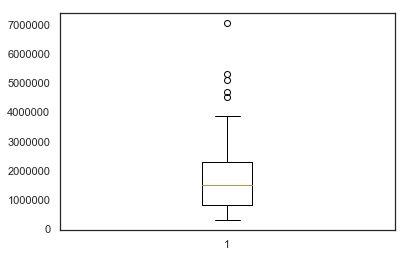

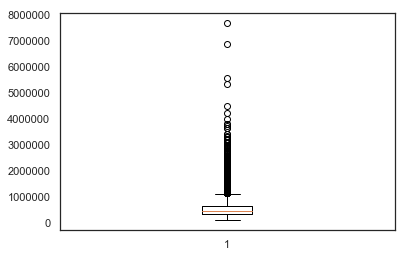

In [174]:
plt.boxplot(df[df.waterfront ==1]['price']);
plt.show()
plt.boxplot(df[df.waterfront ==0]['price']);

The boxplot below tells me that for those houses with a waterfront, most of the prices fall within the second and third quartile and have few outliers prices of houses without a waterfront have significantly more outliers, falling above the max range of $1m

In [175]:
### for the same reasons as sqft_basement, going to replace all nan valueswith 0s, the mode of the column, which accounts for ~11%
df.waterfront = df.waterfront.replace(np.nan, 0)
df.waterfront.isna().sum()

0

In [176]:
print(df.view.unique())
print(df.view.value_counts().nlargest(5))
print(df.view.count())
print(df.view.count() / df.shape[0])
print(1-df.view.count() / df.shape[0])
#because there are overwhelming count of 0 and nans only account for 0.002% of all observations, replacing nans with 0

[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
21534
0.9970829281844701
0.0029170718155299147


In [177]:
### null values for view is less than 0.3% of total observations, which is a very small percentage
### can drop the rows since there are only 64, but because there could be valuable data in the other columns going to keep
### for now and replace with the mode of column as we have done with the other columns 

df.view = df.view.replace(np.nan, 0)
df.view.isna().sum()

0

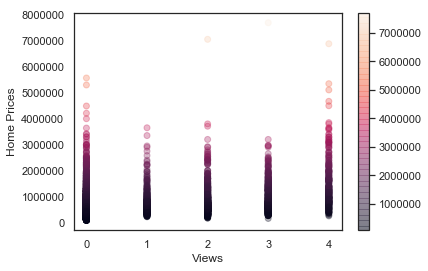

In [178]:
x = df.view
y = df.price

plt.scatter(x,y,c=df['price'], alpha = 0.3)
plt.colorbar()
plt.xlabel('Views')
plt.ylabel('Home Prices')
plt.show()

In [179]:
print(df.yr_renovated.unique())
print(df.yr_renovated.value_counts().nlargest(10))
df.loc[df['yr_renovated']>0].count()

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
Name: yr_renovated, dtype: int64


id               744
date             744
price            744
bedrooms         744
bathrooms        744
sqft_living      744
sqft_lot         744
floors           744
waterfront       744
view             744
condition        744
grade            744
sqft_above       744
sqft_basement    744
yr_built         744
yr_renovated     744
zipcode          744
lat              744
long             744
sqft_living15    744
sqft_lot15       744
dtype: int64

In [180]:
df.yr_renovated = df.yr_renovated.replace(np.nan, 0)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Moving onto the bedrooms, let's take a look at all the instances where there are 33 bedrooms... after running the below cell, can see that only one exists so is clear outlier and should probably be removed. run .describe() function again to see the range of bedrooms

In [181]:
df.loc[df['bedrooms'] ==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [182]:
df = df[df['bedrooms']!= 33]

Let's call upon the .describe() method again to see how our dataset has changed from the above changes.

In [183]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,3.409752,7.657946,1788.631506,285.702954,1971.000787,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,0.650471,1.173218,827.763251,439.825454,29.375460,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


I removed bedrooms outlier (had 33 rooms) and the min max for bedrooms is now 1 to 11 - much better. 

Most of the descriptive statistics coincide with what we'd expect from housing data except for yr_renovated(lots of 0s) Sqft_basement is now included in the table

For now, I decided to drop the ID and the date variables (can add back if necessary later). 

In [184]:
df = df.drop(['id','date'], axis =1)

In [185]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


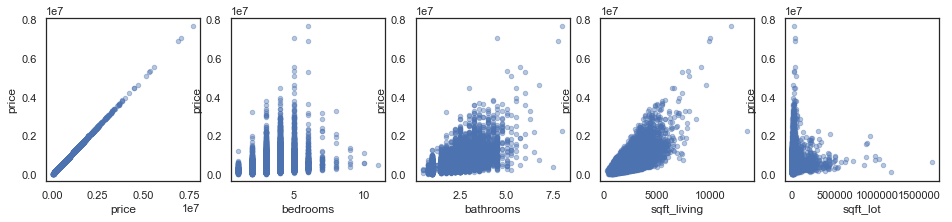

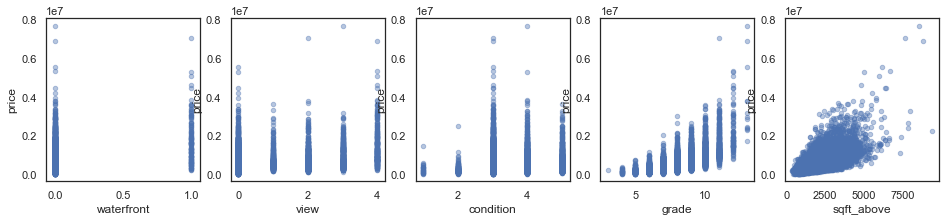

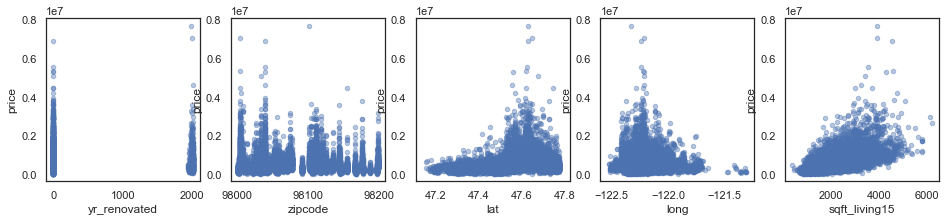

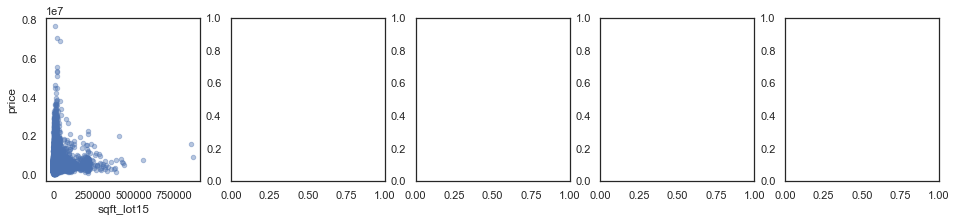

In [186]:
#before making any changes to dataset, I want to see visualizations of each column to the target column, price, where applicable
#checking for categorical columns and also correlation between DV and IVs

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
for xcol, ax in zip(list(df)[0:5], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
for xcol, ax in zip(list(df)[6:11], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
for xcol, ax in zip(list(df)[13:18], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
for xcol, ax in zip(list(df)[18:20], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

As expected floors, waterfront, view, condition and grade appear to be categorical data in the scatter polots, which you can tell from the column-like distros on the plot. Bedrooms and bathrooms i choose to store as continuous variables. What appears to be most obvious correlations with pricing is sqft_living and bathrooms features. 

I also want to see the distribution of each column, skewness and kurtosis using pd.DataFrame.hist

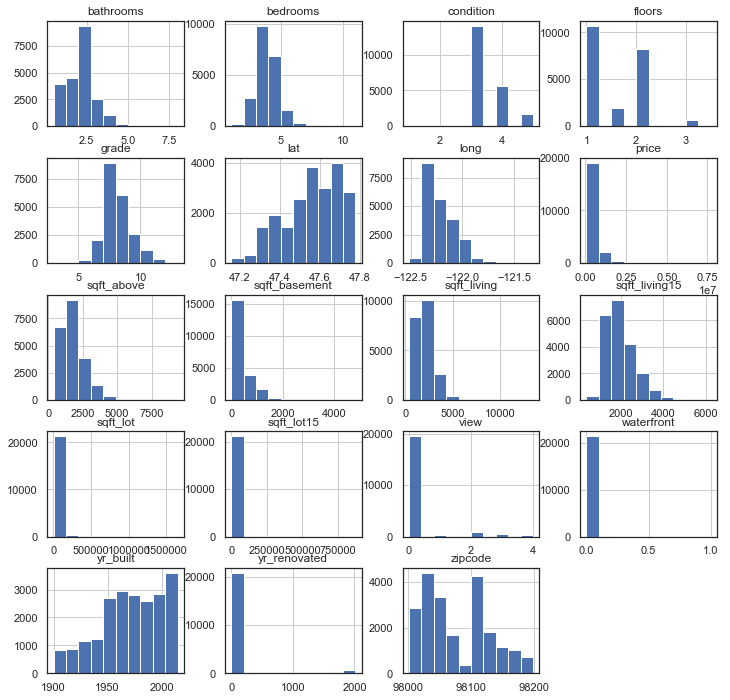

In [187]:
df.hist(figsize = [12,12]);

In [188]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.393502
sqft_basement    0.321103
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
zipcode         -0.053409
Name: price, dtype: float64

Here's what we know about our KC dataset thus far: 

1.) Target variable: price
2.) Continuous variables: sqft_living, sqft_lot, bedrooms, bathrooms, sqft_above, sqft_basement, sqft_living15, sqft_lot15
3.) Categorical variables: floors, waterfront, grade, condition, view
4.) Locational variables: zipcode, lat, long

From the scatter plots and correlation matrix above we can see that sqft_living, grade, sqft_above, sqf_living15 and bathrooms are the most highly correlated predictors of the KC home prices. With that in mind, let's explore sqft_living a bit further to get a better handle of the data. 

First, let's graph some visualizations to see what we can find.

Knowing that size of the house (more accurately, the living space of the house - i.e., not including landscape of the lot) is  one of the biggest drivers of home prices, i'd like to see what the distribution of home prices are by the sqft_living variable using a heated scatter plot. 

What can we expect to see from the heated scatter plot? I'd expect to see strong correlation as larger homes are typically more expensive... 

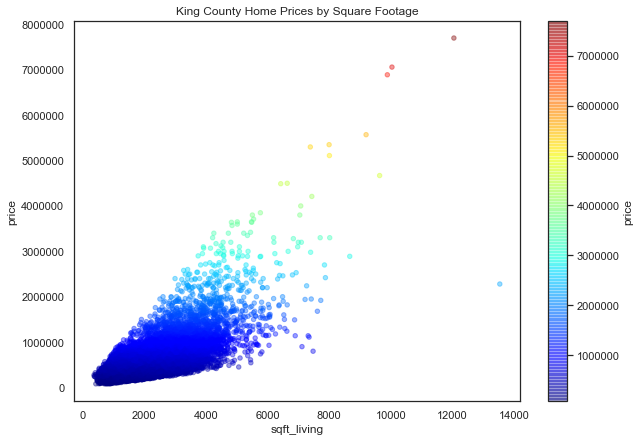

In [189]:
df.plot(kind="scatter", x="sqft_living", y="price", alpha=0.4, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('King County Home Prices by Square Footage');

Appears most houses fall within 200-600k range but the min-max (from our descriptive stats run earlier) is 78k to 7.7mm, which tells me there are clear outliers...From what we can tell from the above graph, a majority of home sizes are in the range of 500-3000 sqft with home prices under $1mm.
Let's look at another visualiation that will help us see outliers from min-max and the quartiles.

Let's graph a boxplot to take a look at outliers that could be driving up the mean value of 'prices'. 

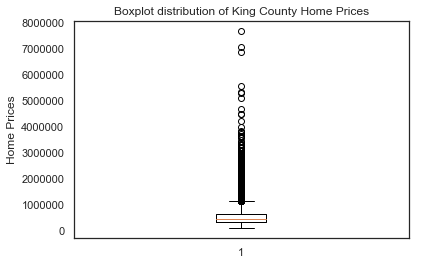

In [190]:
### as suspected there are clear outliers driving the up the mean value 
plt.boxplot(df['price'])
plt.ylabel('Home Prices')
plt.title('Boxplot distribution of King County Home Prices');

As we can see from the heated scatter plot and boxplot visualizations above, there are clear outliers in the dataset. What would the distribution of home prices by sqft_living look like if we removed those outliers?  

Our next few visualizations will focus on answering these questions. To begin, let's first graph a jointplot of home prices that fall between $100k and $1 mm, with square footage range under 3000 sqft, that excludes some of these outliers

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


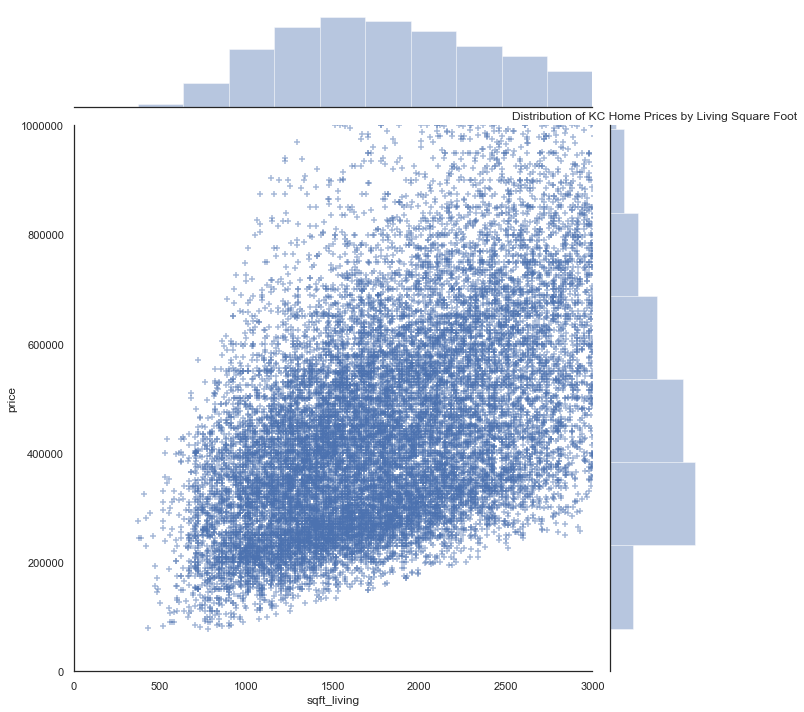

In [191]:
sns.jointplot('sqft_living','price', data=df[['sqft_living','price']], xlim=(0,3000), ylim=(0,1000000), height=10, alpha=.5, marker='+')
plt.title('Distribution of KC Home Prices by Living Square Foot');

Text(0.5, 1.0, 'KC Median Home Prices by Zipcode and Sqft_living')

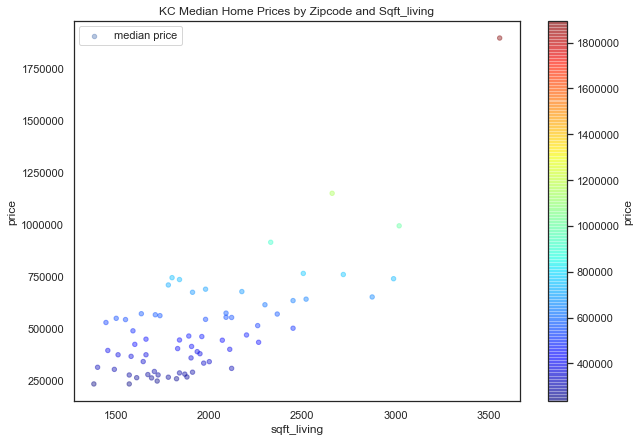

In [193]:
df.groupby('zipcode').median().sort_values('price',ascending = False).plot(kind="scatter", x="sqft_living", y="price", alpha=0.4, figsize=(10,7),
    c="price", label= 'median price', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('KC Median Home Prices by Zipcode and Sqft_living')

Accoridng to our correlation coefficients table, sqft_living is highly correlated with the price of the house, which you can roughly tell from the scatter plot display above but can see more clearly from the grouped scatter plot (grouped by zipcode and reflecting median price/sqft_living). 

How does the relationship between sqft_living and price change when we hone in on specific neighborhoods? Does the relationship become clearer or more dispersed? The location of the houses as well, particularly the latitudinal aspect of the location seems to affect price, as shown in the heated scatter plot below. The increase in housing prices towards the northern region is more pointedly shown in the second scatter plot below, which groups the prices by neighborhood (using zipcode) and takes the median value of home prices in said zip code (median seemed to be better choice than mean value of prices as home prices within a given zipcode can vary greatly). 

Knowing that location is one of the biggest contributors to home prices, I would like to see how the relationship between sqft_living and price changes based on zipcode. 

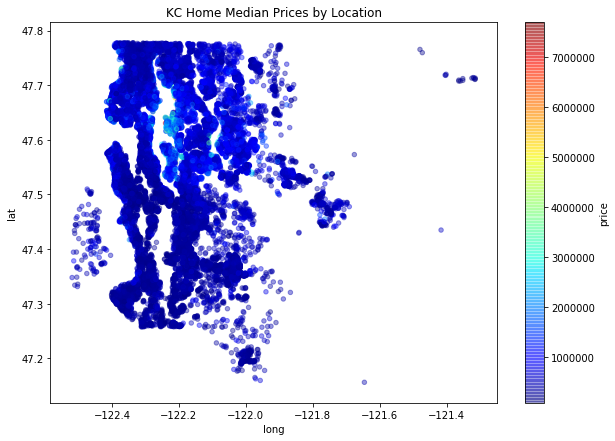

In [33]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('KC Home Median Prices by Location');

We can see from the above plot that the higher priced homes are clustered around the Northwestern part of the county.For a clearler picture, i am going to group by zipcode and take the median vale of the homes within said zipcode (i am looking at median prices to exclude the outliers). Let's take another look at the same graph, this time grouped by zipcode.

Text(0.5, 1.0, 'KC Median Home Prices by Zipcode')

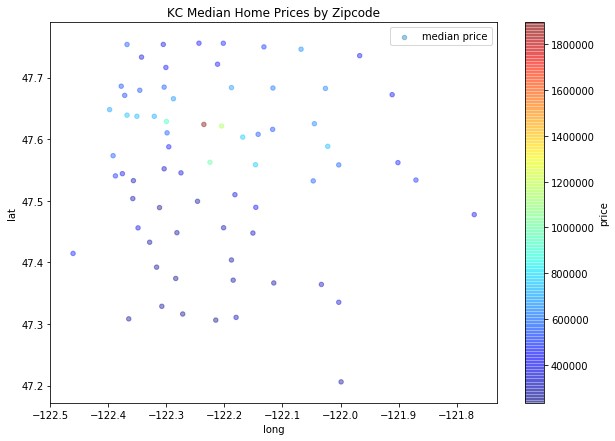

In [34]:
df_neighborhood = df.groupby('zipcode').median().sort_values('price',ascending = False)
df_neighborhood.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
    c="price", label= 'median price', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('KC Median Home Prices by Zipcode')

From the heated scatter plot above, it is clear that home prices increase as we zone in on the location lat(47.5 to 47.7), long(-122.4 to -122.1). Let's group the data by zipcode and look at the median homes prices and the number of homes within each. 

In [35]:
df.groupby('zipcode')['price'].median().sort_values(ascending = False)

zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
98006     760184.5
98119     744975.0
98075     739999.0
98109     736000.0
98102     710000.0
98199     689800.0
98033     678350.0
98105     675000.0
98077     652475.0
98074     642000.0
98053     635000.0
98052     615000.0
98029     575000.0
98122     572000.0
98027     570500.0
98115     567000.0
98116     562750.0
98007     555000.0
98177     554000.0
98103     550000.0
98008     545000.0
98117     544000.0
98107     529950.0
98072     515000.0
98065     502500.0
           ...    
98045     404750.0
98019     401250.0
98126     395750.0
98166     390000.0
98056     380000.0
98133     375000.0
98155     375000.0
98118     367500.0
98010     359999.5
98108     342500.0
98038     342000.0
98058     335000.0
98106     315000.0
98092     309780.0
98146     305000.0
98055     294950.0
98042     291500.0
98031     288000.0
98030     282255.0
98022     280000.0
98178     278277.0
9814

In [36]:
df.groupby('zipcode')['price'].count().sort_values(ascending = False)

zipcode
98103    601
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: price, Length: 70, dtype: int64

The two zipcodes I'd like to take a look at further is 98039, which has the highest median home price of all 70 zipcodes, and 98103, which has the most homes of all the zipcodes. I expect to see sparser distribution of homes in the wealthiest zipcode and cheaper pricing within the most denselly populate zipcode. 

In [37]:
zip98039 = df['zipcode'] == 98039
zip98103 = df['zipcode'] == 98103

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


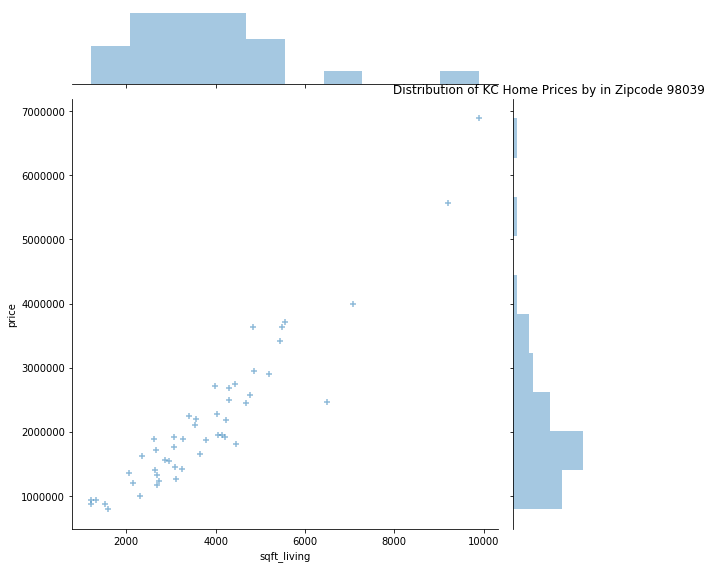

In [38]:
sns.jointplot('sqft_living','price', data=df[zip98039], height=8, alpha=.5, marker='+')
plt.title('Distribution of KC Home Prices by in Zipcode 98039');

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


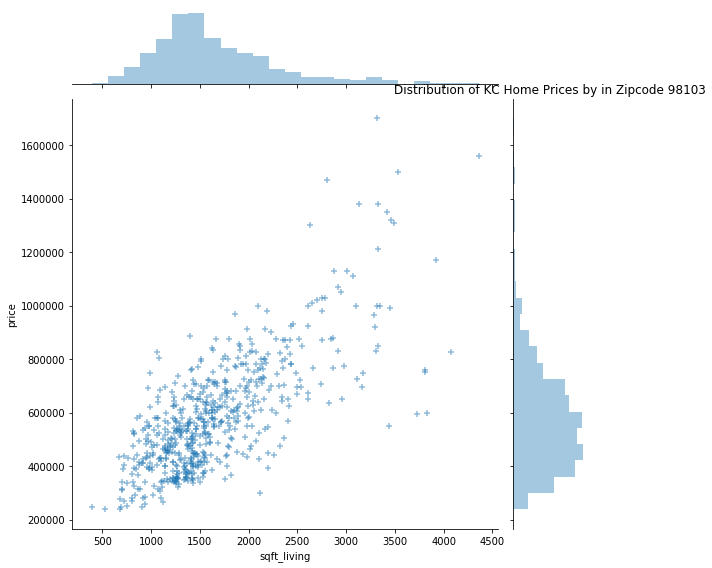

In [39]:
sns.jointplot('sqft_living','price', data=df[zip98103], height=8, alpha=.5, marker='+')
plt.title('Distribution of KC Home Prices by in Zipcode 98103');

As expected, there are fewer homes in the wealthier neighborhood and pricing is much better correlated with sqft_living than when we ran the jointplot for all zipcodes. In the more densely populated zipcode, frequency of pricing and sqft_living are more clustered but you can still see a clear positive correlation between pricing and sqft_living that is also a more distinct linear relationship than when we graphed a scatter plot for all zipcodes. We now know that correlation of sqft_living is better when split out by zipcode. 

Now that we have looked at the relationship between home prices and sqft_living and location (attributes I consider immutable - cannot uproot your home to different location and without meaningful investments tough to change total square footage of living space also can't change whether house is on waterfront or not), let's now take a look at how mutable attributes (conditions, grading, renovations (like more bathrooms), etc.) affect home prices.

Generally speaking, newer homes tend to have a higher value than older ones. For example, newer infrastructure of the house and newer plumbing and electricity tend to attract buyers as the liklihood of them breaking down is less, potentially generating huge savings in the future. From our dataset, I would consider condition, grading and renovations to positively correlate with home prices. 

Let's take a look at some visualizations to see if this is true in our KC housing data. 

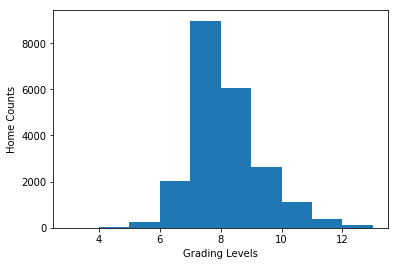

In [40]:
plt.hist(df['grade'])
plt.xlabel('Grading Levels')
plt.ylabel('Home Counts');

In [41]:
df.groupby('grade')['price'].median().sort_values(ascending = False)

grade
13    2980000.0
12    1820000.0
11    1280000.0
10     914327.0
9      720000.0
8      510000.0
7      375000.0
6      275276.5
3      262000.0
5      228700.0
4      200000.0
Name: price, dtype: float64

In [42]:
df_grade = df.groupby('grade').median().reset_index()
df_grade.head(10)

,grade,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,262000.0,1.0,0.75,520.0,12981.0,1.0,0.0,0.0,5.0,520.0,0.0,1920.0,0.0,98022.0,47.20820,-121.9950,1340.0,12233.0
1,4,200000.0,2.0,1.00,700.0,8636.0,1.0,0.0,0.0,3.0,660.0,0.0,1942.0,0.0,98055.0,47.49820,-122.1990,1420.0,8990.0
2,5,228700.0,2.0,1.00,905.0,7175.0,1.0,0.0,0.0,3.0,860.0,0.0,1939.0,0.0,98059.0,47.49735,-122.2325,1335.0,7432.0
3,6,275276.5,3.0,1.00,1120.0,7196.0,1.0,0.0,0.0,3.0,1010.0,0.0,1944.0,0.0,98117.0,47.52515,-122.3010,1320.0,7200.0
4,7,375000.0,3.0,1.75,1630.0,7410.0,1.0,0.0,0.0,3.0,1320.0,0.0,1963.0,0.0,98074.0,47.56500,-122.2770,1620.0,7500.0
5,8,510000.0,3.0,2.50,2150.0,7266.0,2.0,0.0,0.0,3.0,1780.0,0.0,1985.0,0.0,98059.0,47.58780,-122.2120,2060.0,7308.0
6,9,720000.0,4.0,2.50,2820.0,8160.0,2.0,0.0,0.0,3.0,2570.0,0.0,1996.0,0.0,98056.0,47.59700,-122.1670,2650.0,8160.0
7,10,914327.0,4.0,2.75,3450.0,11245.0,2.0,0.0,0.0,3.0,3140.0,0.0,1994.0,0.0,98053.0,47.59755,-122.1425,3080.0,10918.5
8,11,1280000.0,4.0,3.50,4260.0,15467.0,2.0,0.0,0.0,3.0,3820.0,0.0,1997.0,0.0,98052.0,47.60190,-122.1440,3560.0,14486.0
9,12,1820000.0,4.0,3.75,5000.0,25714.0,2.0,0.0,1.0,3.0,4510.0,290.0,1998.0,0.0,98033.0,47.59220,-122.1480,4060.0,19602.0


C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


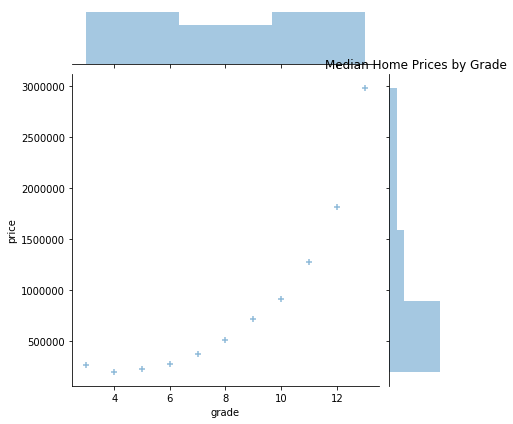

In [43]:
sns.jointplot('grade','price', data=df_grade, height=6, alpha=.5, marker='+')
plt.title('Median Home Prices by Grade');

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


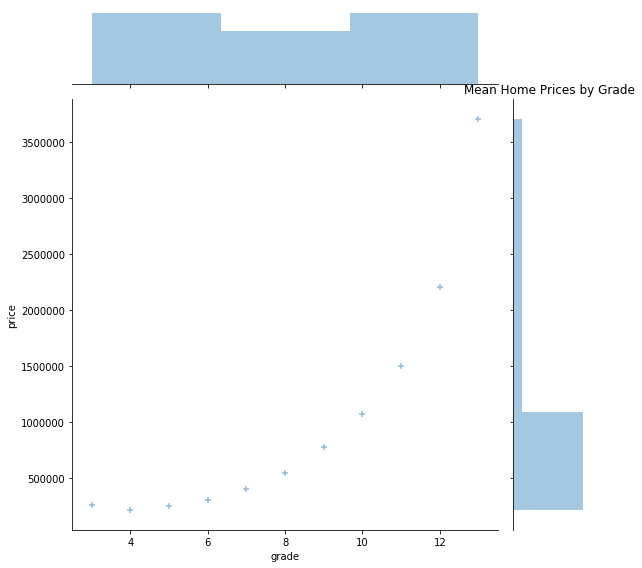

In [44]:
df_grade_mean = df.groupby('grade').mean().reset_index()

sns.jointplot('grade','price', data=df_grade_mean, height=8, alpha=.5, marker='+')
plt.title('Mean Home Prices by Grade');

The price distribution of KC Homes by grade has a clear exponential relationship, rather than linear. This suggests that home prices increase more rapidly for each incremental grade level. In our dataset grade levels are defined as such: 

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

According to HomeAdvisor, "a typical residential excavation job runs between $1433  and  $5057 with an average of $3069."

For home owners looking to maximize the selling price of their homes, improving their homes' grading can be a more cost-effective means of increasing sales price vs. expensive renovations. 

Now let's investigate how the condition of homes relates to pricing data. 

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


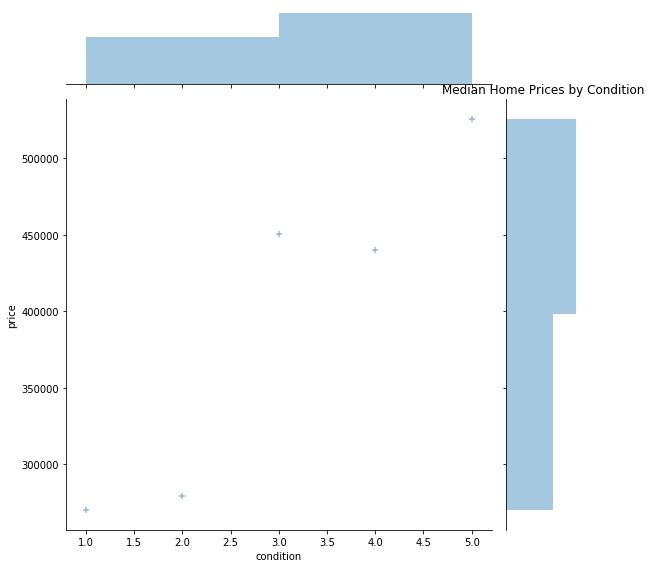

In [45]:
df_conditions = df.groupby('condition').median().reset_index()

sns.jointplot('condition','price', data=df_conditions, height=8, alpha=.5, marker='+')
plt.title('Median Home Prices by Condition');

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


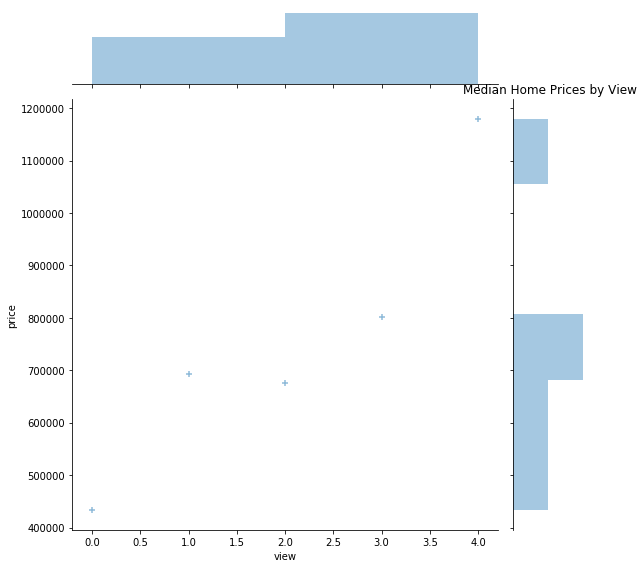

In [46]:
df_conditions = df.groupby('view').median().reset_index()

sns.jointplot('view','price', data=df_conditions, height=8, alpha=.5, marker='+')
plt.title('Median Home Prices by View');

Condition doesn't seem to be a great predictor of housing prices. While there appears to be a rough relationship, it seems most homes are categorized as condition 3 and that the median home price within that category is above the median price of condition 4 home. If a homeowner's house is already categorized as condition 3, likely not worth it to improve their home conditions to a 4 or 5. 

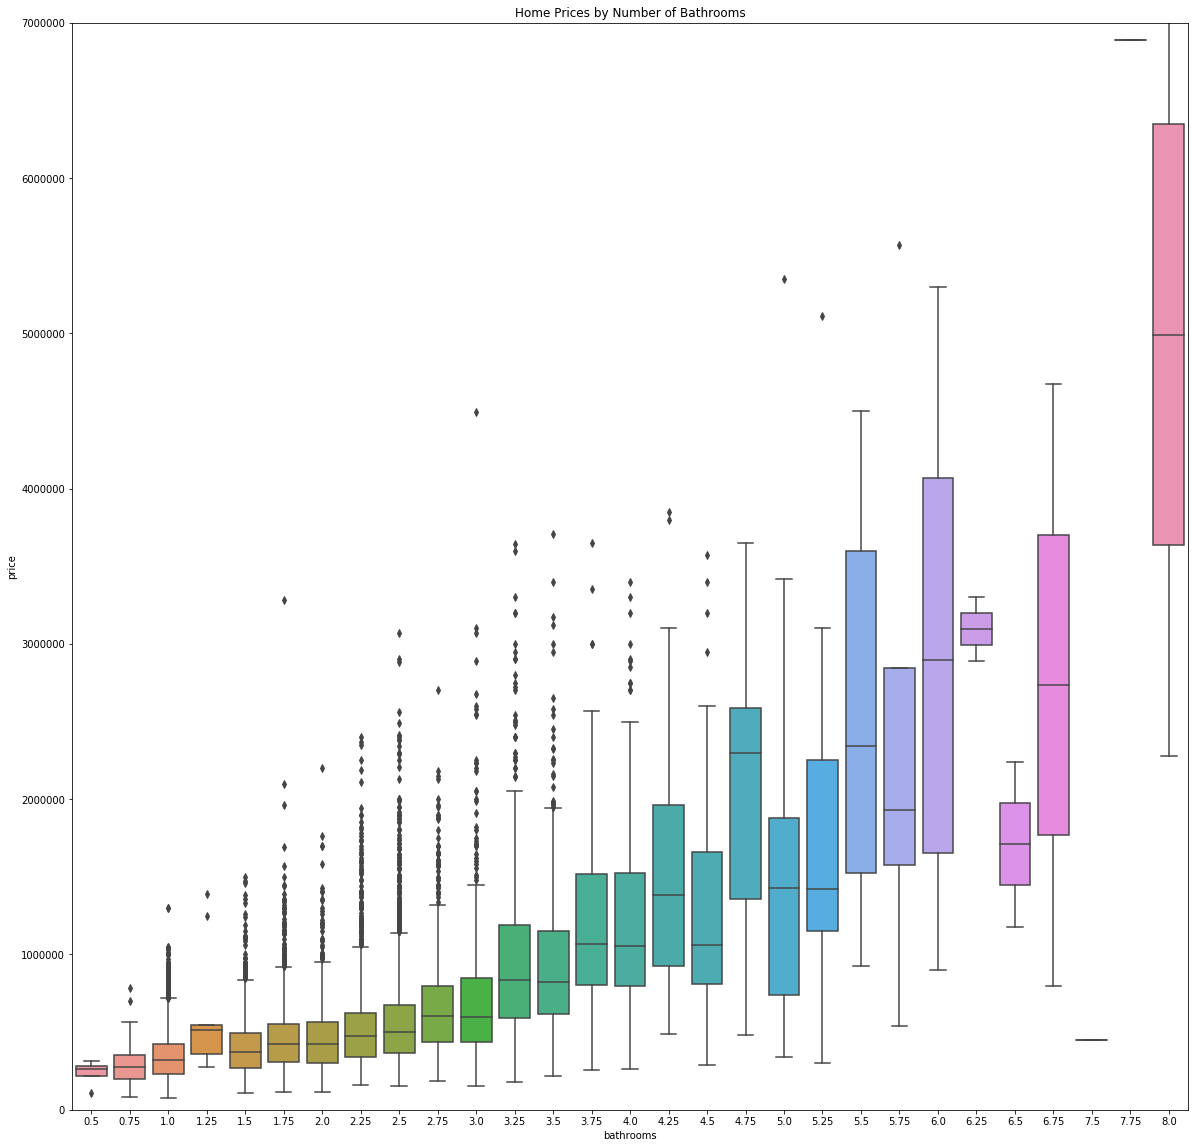

In [47]:
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=df['bathrooms'], y="price", data=df)
fig.axis(ymin=0, ymax=7000000)
plt.title('Home Prices by Number of Bathrooms');

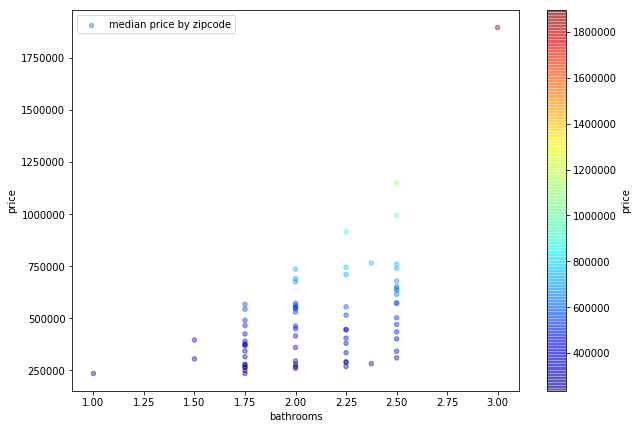

In [51]:
df_neighborhood.plot(kind="scatter", x="bathrooms", y="price", alpha=0.4, figsize=(10,7),
    c="price", label= 'median price by zipcode', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

There appears to be more outliers in price with fewer number of bathrooms. Above 4 bathrooms most home prices generally fall within min-max range. General trend appears to be upward sloping but lots of outliers that muddles the data. 

The relationship between price and bedrooms appears to be less so than with bathrooms. Lots of outliers and the difference in price is less prominent. 

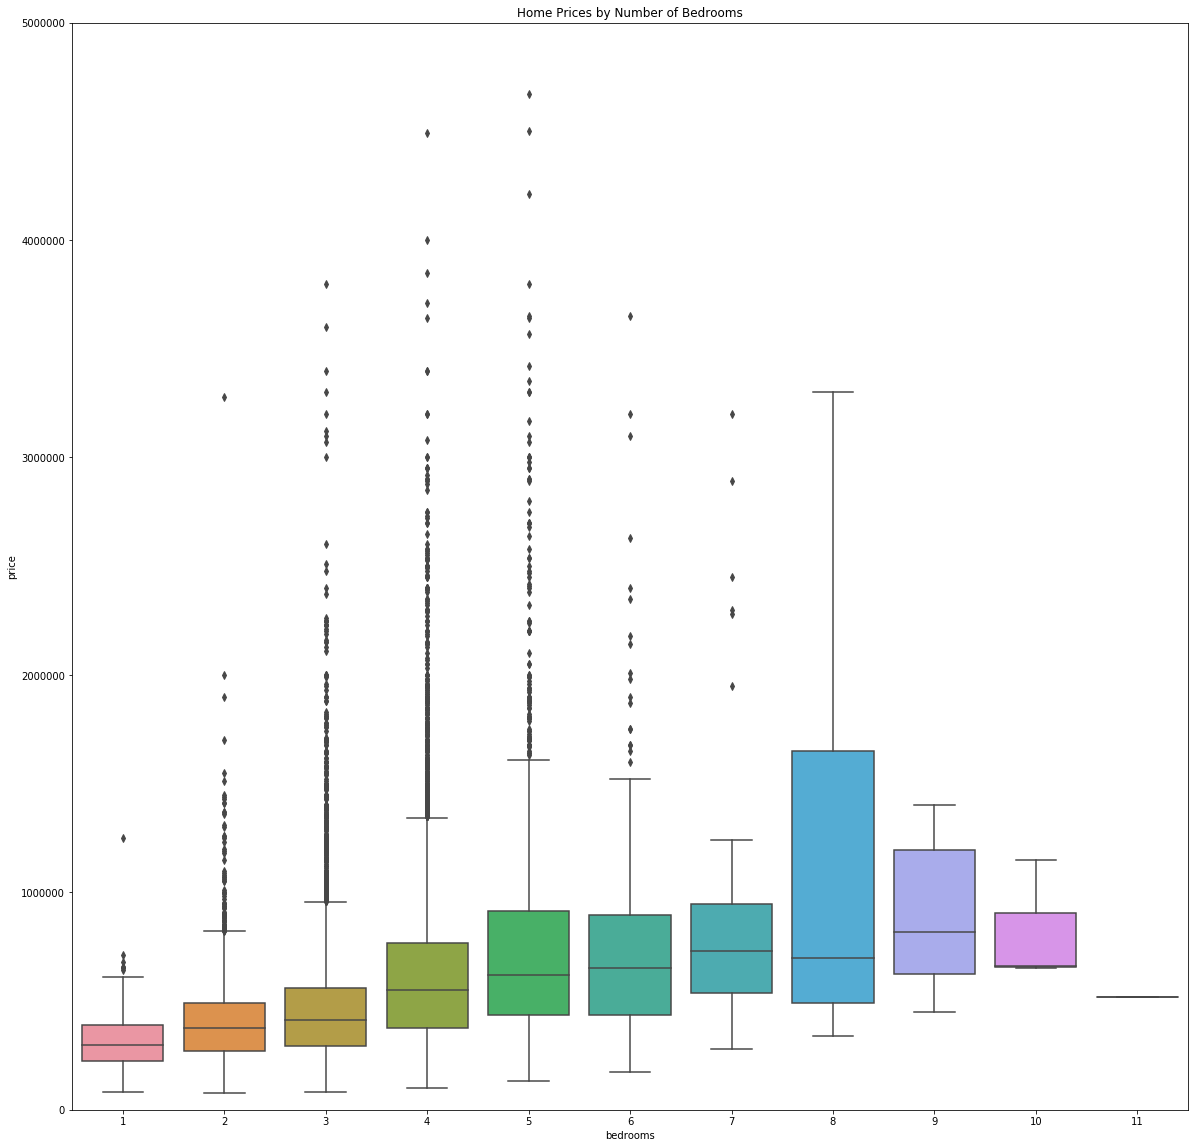

In [53]:
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=df['bedrooms'], y="price", data=df)
fig.axis(ymin=0, ymax=5000000)
plt.title('Home Prices by Number of Bedrooms');

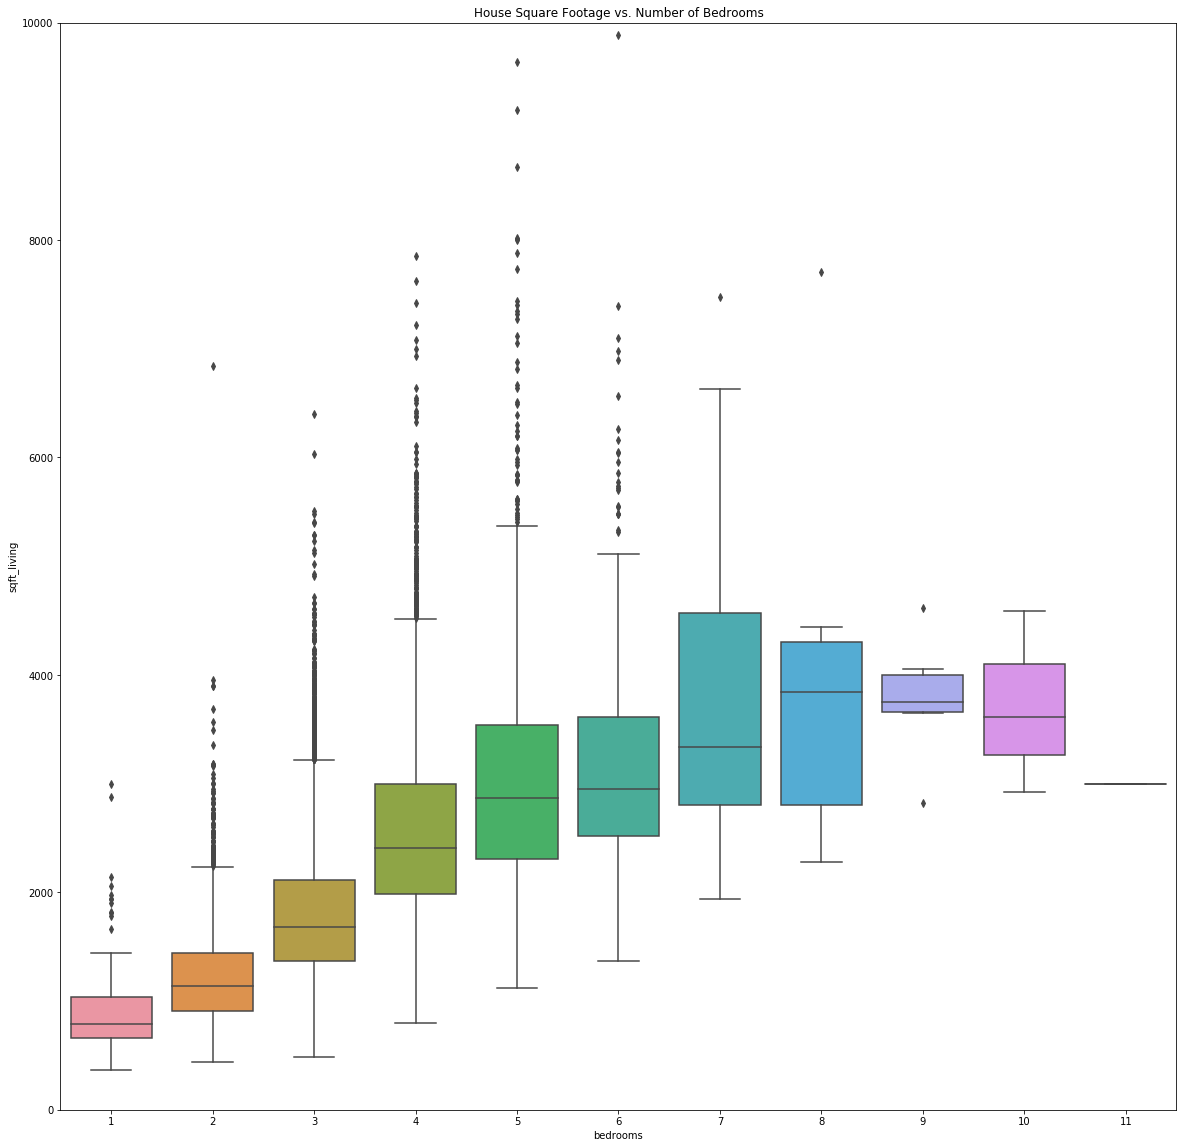

In [54]:
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=df['bedrooms'], y="sqft_living", data=df)
fig.axis(ymin=0, ymax=10000)
plt.title('House Square Footage vs. Number of Bedrooms');

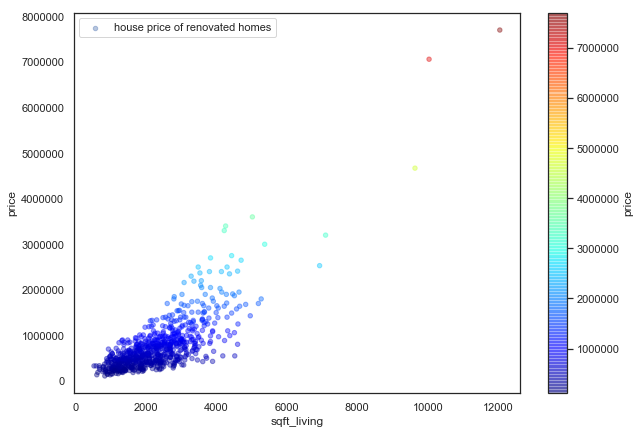

In [199]:
df_renovated = df.loc[df['yr_renovated'] != 0]
df_renovated.plot(kind="scatter", x="sqft_living", y="price", alpha=0.4, figsize=(10,7),
    c="price", label= 'house price of renovated homes', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

Now that we have completed some exploratory analysis of our data, let's begin building our model. Though there appear to be clear categorical variables in our dataset, for experimental purposes I am going to run a regression model using all variables as continuous and then re-run the same steps after categorizing and binning the categorically-identified columns. 

First, we'll build a regression model under assumption that all are continous variables. 

Before building our continuous model, let's run a correlation matrix to see which features are most correlated with the dependent variable.

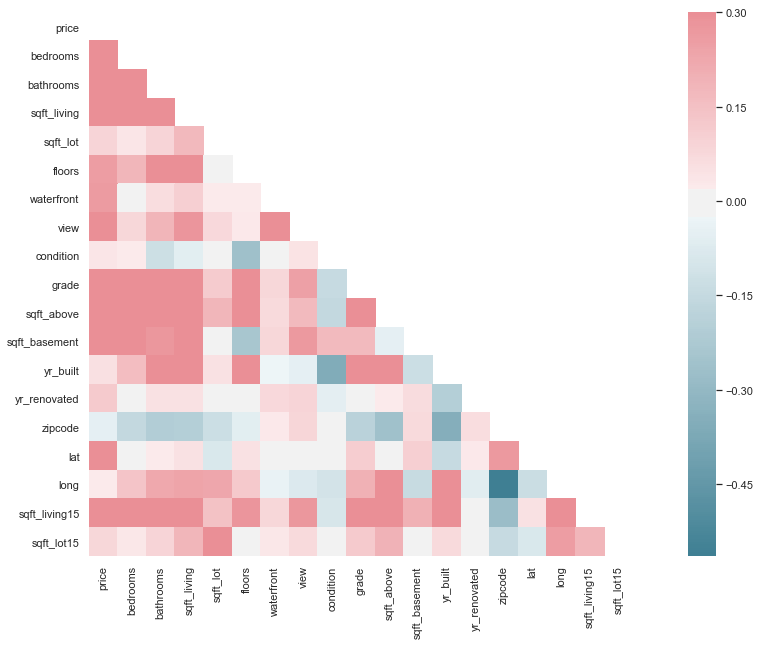

In [55]:
sns.set(style="white")

corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (20,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask = mask, cmap = cmap, vmax=.3, center=0,square = True)

In [56]:
### now that we've seen the correlation matrix, let's get the actual correlation coefficients of each attribute
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.393502
sqft_basement    0.321103
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
zipcode         -0.053409
Name: price, dtype: float64

In [57]:
df_no_cat = df.copy()

In [58]:
### run cross-val score from sklearn package to assess how accurately the model will predict our target variable, price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

model = LinearRegression()
X = df_no_cat.drop(['price'], axis =1)
y = df_no_cat['price']

scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.69458332 0.70150414 0.69014084 0.69574029 0.68119309 0.70292181
 0.71393727 0.70743036 0.69609636 0.67452975]
Average cross-validation score: 0.70


In [59]:
### same as what we got above when we ran cross_val_score, ols tells us that our current model is 70% predictive of the 
### outcome or target variable

model = LinearRegression()

X = df_no_cat.drop(['price'], axis = 1)
y = pd.DataFrame(df_no_cat, columns = ['price'])

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2805.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:36   Log-Likelihood:            -2.9435e+05
No. Observations:               21596   AIC:                         5.887e+05
Df Residuals:                   21577   BIC:                         5.889e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.016e+06   2.93e+06      2.396      0.017    1.28e+06    1.28e+07
bedrooms      -3.927e+04   1978.769    -19.846      0.000   -4.31e+04   -3.54e+04
bathrooms      4.271e+04   3264.966     13.082      0.000    3.63e+04    4.91e+04
sqft_living     105.2067     18.065      5.824      0.000      69.797     140.616
sqft_lot          0.1257      0.048      2.624      0.009       0.032       0.220
floors         6907.6478   3597.715      1.920      0.055    -144.140     1.4e+04
waterfront     6.167e+05   1.81e+04     34.031      0.000    5.81e+05    6.52e+05
view           5.302e+04   2120.755     25.001      0.000    4.89e+04    5.72e+04
condition      2.677e+04   2344.542     11.417      0.000    2.22e+04    3.14e+04
grade          9.639e+04   2160.522     44.612      0.000    9.22e+04    1.01e+05
sqft_above       77.6465     18.052      4.301      0.000      42.263     113.030
sqft_basement    47.3302     17.892      2.645      0.008      12.261      82.399
yr_built      -2647.4604     71.890    -36.826      0.000   -2788.370   -2506.550
yr_renovated     23.3675      3.974      5.880      0.000      15.578      31.157
zipcode        -587.2982     32.966    -17.815      0.000    -651.915    -522.682
lat            5.995e+05   1.07e+04     55.871      0.000    5.78e+05    6.21e+05
long          -2.177e+05   1.31e+04    -16.561      0.000   -2.43e+05   -1.92e+05
sqft_living15    21.5496      3.448      6.250      0.000      14.792      28.307
sqft_lot15       -0.3934      0.073     -5.367      0.000      -0.537      -0.250
==============================================================================
Omnibus:                    18265.348   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1809935.792
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      47.286   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
#drop floors - has p-value of 0.055

model = LinearRegression()

X = df_no_cat.drop(['price','floors'], axis = 1)
y = pd.DataFrame(df_no_cat, columns = ['price'])

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2970.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:36   Log-Likelihood:            -2.9436e+05
No. Observations:               21596   AIC:                         5.887e+05
Df Residuals:                   21578   BIC:                         5.889e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.043e+06   2.88e+06      2.095      0.036    3.89e+05    1.17e+07
bedrooms      -3.936e+04   1978.334    -19.896      0.000   -4.32e+04   -3.55e+04
bathrooms      4.437e+04   3148.599     14.092      0.000    3.82e+04    5.05e+04
sqft_living     102.5916     18.015      5.695      0.000      67.281     137.903
sqft_lot          0.1236      0.048      2.582      0.010       0.030       0.217
waterfront     6.168e+05   1.81e+04     34.033      0.000    5.81e+05    6.52e+05
view           5.312e+04   2120.242     25.054      0.000     4.9e+04    5.73e+04
condition       2.65e+04   2340.605     11.323      0.000    2.19e+04    3.11e+04
grade          9.676e+04   2151.900     44.964      0.000    9.25e+04    1.01e+05
sqft_above       81.3688     17.949      4.533      0.000      46.187     116.550
sqft_basement    47.3474     17.893      2.646      0.008      12.276      82.419
yr_built      -2617.9813     70.236    -37.274      0.000   -2755.649   -2480.314
yr_renovated     23.7001      3.971      5.969      0.000      15.917      31.483
zipcode        -581.4126     32.826    -17.712      0.000    -645.753    -517.072
lat            6.012e+05   1.07e+04     56.213      0.000     5.8e+05    6.22e+05
long          -2.198e+05   1.31e+04    -16.785      0.000   -2.46e+05   -1.94e+05
sqft_living15    20.8067      3.426      6.073      0.000      14.091      27.522
sqft_lot15       -0.3982      0.073     -5.436      0.000      -0.542      -0.255
==============================================================================
Omnibus:                    18212.870   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1790366.798
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      47.045   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

looking at the p-values, predictors that don't contribute significantly to the model outcome (i.e., p-value > 0.05) appear to be floors

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

going to run recursive feature elimination to help us select which features we want to include in our model and which to exclude. In the first instance i'd like to select the five top features and go from there

In [62]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)

In [63]:
Y = df_no_cat['price']
X = df_no_cat.drop(['price'], axis = 1)

In [64]:
selector = selector.fit(X,Y)

In [65]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
### run ranking to help us show which columns are most important from 1 being the most to 21 being the least
selector.ranking_

array([ 4,  2,  8, 14,  6,  1,  1,  3,  1,  9, 10,  5, 11,  7,  1,  1, 12,
       13])

In [67]:
### important to note that to run RFE properly have to scale all the predictors to the same scale, otherwise a column with 
### greater magnitude may falsely be attributed more weight in predicting the outcome... storing the rankings i just ran 
### as a variable to later compare the differences between scaled vs non-scaled

no_scale = selector.ranking_

In [68]:
linreg.fit(X,Y)
linreg.coef_

array([-3.92713544e+04,  4.27111858e+04,  1.05206715e+02,  1.25676913e-01,
        6.90764782e+03,  6.16734058e+05,  5.30202497e+04,  2.67684595e+04,
        9.63855946e+04,  7.76465486e+01,  4.73302039e+01, -2.64746036e+03,
        2.33675182e+01, -5.87298159e+02,  5.99515847e+05, -2.17683681e+05,
        2.15495853e+01, -3.93391778e-01])

In [69]:
### scale the predictors using MinMaxScaler and store data as new variable scaled_data

scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [70]:
scaled_data

array([[0.2       , 0.06666667, 0.06150342, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.2       , 0.23333333, 0.16704632, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.1       , 0.06666667, 0.03037206, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.1       , 0.03333333, 0.04935459, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.2       , 0.26666667, 0.09339408, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.1       , 0.03333333, 0.04935459, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [71]:
linreg.fit(scaled_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
selector = selector.fit(scaled_data,Y)

In [73]:
### create new variable that stores ranking of the scaled data into scaled

scaled = selector.ranking_

In [74]:
### plot scaled vs non-scaled side by side to see the difference in rankings

features = pd.DataFrame({'Columns': X.columns,
                       'Not_Scaled': no_scale,
                         'Scaled': scaled})

Text(0, 0.5, 'Features Importance')

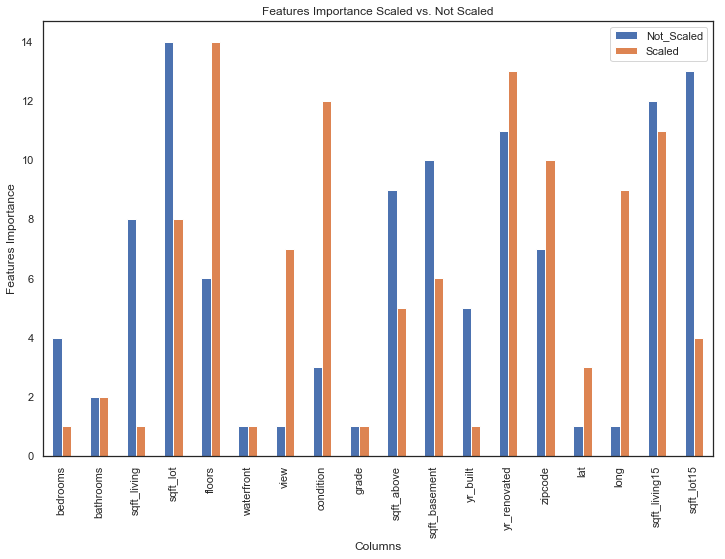

In [75]:
ax = features.set_index('Columns').plot(kind = 'bar',figsize = (12,8))
ax.set_title('Features Importance Scaled vs. Not Scaled')
ax.set_ylabel('Features Importance')

In [76]:
### call the features dataframe to see how the rankings of each column has changed from non-scaled to scaled

features.sort_values('Scaled',ascending = True)

,Columns,Not_Scaled,Scaled
0,bedrooms,4,1
11,yr_built,5,1
5,waterfront,1,1
8,grade,1,1
2,sqft_living,8,1
1,bathrooms,2,2
14,lat,1,3
17,sqft_lot15,13,4
9,sqft_above,9,5
10,sqft_basement,10,6


Next I will run a for loop to see how my r-squared changes as i add more predictors. create an empty list and append the new r-squared as we iterate through all the columns and add an additional predictor to the model we can expect the r-squared to increase as we add more variables (typical for r-squared and also one of the negatives)

In [77]:
r_squared = []

for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data,Y)
    linreg.fit(X[X.columns[selector.support_]],Y)
    r_sq = linreg.score(X[X.columns[selector.support_]],Y)
    r_squared.append(r_sq)

In [78]:
r_squared

[0.49270416095391417,
 0.534718656630968,
 0.5711842138064869,
 0.6337753383528815,
 0.6391298706842163,
 0.6442153429109898,
 0.6820264702949211,
 0.6825094364044317,
 0.682593502035357,
 0.6826986053286577,
 0.6918222781802696,
 0.6918481632074167,
 0.6926448901019213,
 0.6980996364627075,
 0.6985293766677072,
 0.7000632356121428,
 0.7005576357530474]

In [79]:
len(X.columns)

18

Plot the r-squared's to see at how many variables the r-squared begins to plateau. this is referred to as an elbow method from the plot below we can see that after 4-5 features, the r-squared kind of flattens


Text(0.5, 0, 'Number of Features')

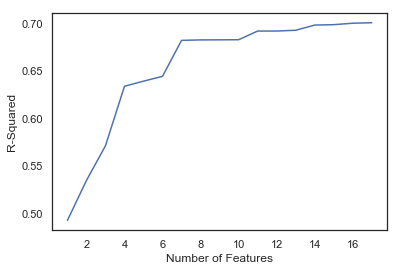

In [80]:
plt.plot(range(1,len(X.columns)), r_squared)
plt.ylabel('R-Squared')
plt.xlabel('Number of Features')

Next we'll do the same for MSE. import MSe from sklearn package and run a for loop iterating through each column and calculating the new MSE as we add an additional predictor to the model 

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
mse = []

for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data,Y)
    linreg.fit(X[X.columns[selector.support_]],Y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(Y,y_pred))

In [83]:
mse

[68464083356.53534,
 62793853654.62113,
 57872502533.74111,
 49425273838.97874,
 48702632098.89051,
 48016302411.86635,
 42913354629.19614,
 42848174059.132545,
 42836828654.89286,
 42822644031.09007,
 41591323270.00304,
 41587829855.470764,
 41480304478.12816,
 40744137963.85938,
 40686140702.78961,
 40479132802.17984,
 40412409107.93068]

Text(0.5, 0, 'Number of Features')

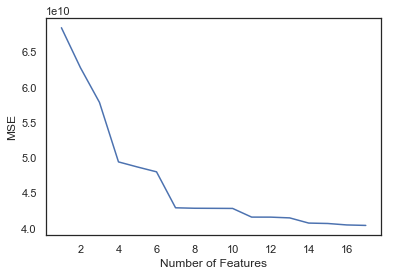

In [84]:
plt.plot(range(1, len(X.columns)),mse)
plt.ylabel('MSE')
plt.xlabel('Number of Features')

Similar to the r_squared (but in reverse) ideal number of features to use would be when the plot begins to plateau. In this case ~7 features. knowing what we know about linear regression fewer features we use is better for interpretability

Text(0.5, 0, 'Number of Features')

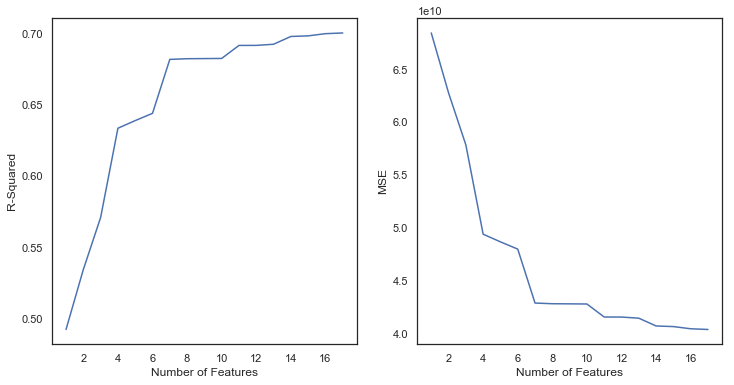

In [85]:
### plot the above graphs side by side so that we can have a better visualization of them 

fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(121)
ax1.plot(range(1,len(X.columns)), r_squared)
ax1.set_ylabel('R-Squared')
ax1.set_xlabel('Number of Features')

ax2 = plt.subplot(122)
ax2.plot(range(1, len(X.columns)),mse)
ax2.set_ylabel('MSE')
ax2.set_xlabel('Number of Features')

In [86]:
### call the features dataframe again to see which scaled features fall within the top 7

features.sort_values('Scaled',ascending = True)

,Columns,Not_Scaled,Scaled
0,bedrooms,4,1
11,yr_built,5,1
5,waterfront,1,1
8,grade,1,1
2,sqft_living,8,1
1,bathrooms,2,2
14,lat,1,3
17,sqft_lot15,13,4
9,sqft_above,9,5
10,sqft_basement,10,6


In [87]:
### run ols model on the top 7 features to see how this affects our r-squared

model = LinearRegression()

X_7 =df_no_cat[['bedrooms','yr_built','waterfront','grade','sqft_living','bathrooms','lat']]
Y = pd.DataFrame(df_no_cat, columns = ['price'])

X_int = sm.add_constant(X_7)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     6615.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:42   Log-Likelihood:            -2.9500e+05
No. Observations:               21596   AIC:                         5.900e+05
Df Residuals:                   21588   BIC:                         5.901e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.978e+07   5.39e+05    -36.721      0.000   -2.08e+07   -1.87e+07
bedrooms    -4.066e+04   2014.059    -20.188      0.000   -4.46e+04   -3.67e+04
yr_built    -3220.9879     60.195    -53.509      0.000   -3338.974   -3103.002
waterfront   7.872e+05   1.74e+04     45.216      0.000    7.53e+05    8.21e+05
grade        1.137e+05   2042.586     55.681      0.000     1.1e+05    1.18e+05
sqft_living   182.9719      3.097     59.081      0.000     176.902     189.042
bathrooms    5.057e+04   3179.835     15.904      0.000    4.43e+04    5.68e+04
lat           5.35e+05   1.06e+04     50.666      0.000    5.14e+05    5.56e+05
==============================================================================
Omnibus:                    17855.097   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1521422.038
Skew:                           3.460   Prob(JB):                         0.00
Kurtosis:                      43.533   Cond. No.                     1.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

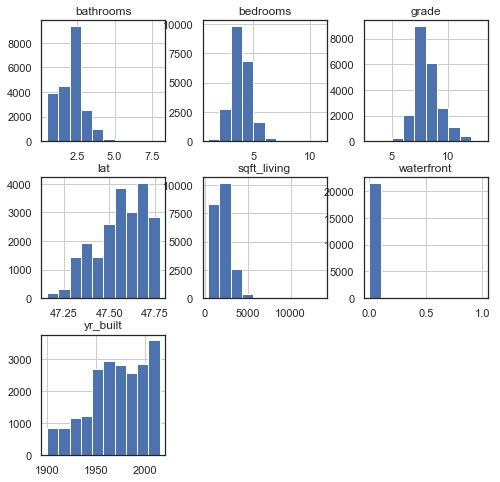

In [88]:
### r-squared was lowered from 70% to 68%.... let's take a look at histograms of the top_5 features to check for skewness
### kurtosis 

X_7.hist(figsize = (8,8));

lat and sqft_living look to be most skewed. let's try and normalize this by taking the log also price is fairly positively skewed do to the outliers (as we've seen from the boxplot, scatter plot and histogram earlier). let's also try and normalize the dependent variable to see if it helps our outcome 

In [89]:
df_no_cat['log_bathrooms'] = np.log(df_no_cat['bathrooms'])
df_no_cat['log_bedrooms'] = np.log(df_no_cat['bedrooms'])
df_no_cat['log_grade'] = np.log(df_no_cat['grade'])
df_no_cat['log_sqft_living'] = np.log(df_no_cat['sqft_living'])
df_no_cat['log_lat'] = np.log(df_no_cat['lat'])
df_no_cat['log_yr_built'] = np.log(df_no_cat['yr_built'])
df_no_cat['log_price'] = np.log(df_no_cat['price'])


df_no_cat['log_bathrooms'] = (df_no_cat['log_bathrooms'] - np.mean(df_no_cat['log_bathrooms'])) / (max(df_no_cat['log_bathrooms']) - min(df_no_cat['log_bathrooms']))
df_no_cat['log_bedrooms'] = (df_no_cat['log_bedrooms'] - np.mean(df_no_cat['log_bedrooms'])) / (max(df_no_cat['log_bedrooms']) - min(df_no_cat['log_bedrooms']))
df_no_cat['log_grade'] = (df_no_cat['log_grade'] - np.mean(df_no_cat['log_grade'])) / (max(df_no_cat['log_grade']) - min(df_no_cat['log_grade']))
df_no_cat['log_sqft_living'] = (df_no_cat['log_sqft_living'] - np.mean(df_no_cat['log_sqft_living'])) / (max(df_no_cat['log_sqft_living']) - min(df_no_cat['log_sqft_living']))
df_no_cat['log_lat'] = (df_no_cat['log_lat'] - np.mean(df_no_cat['log_lat'])) / (max(df_no_cat['log_lat']) - min(df_no_cat['log_lat']))
df_no_cat['log_yr_built'] = (df_no_cat['log_yr_built'] - np.mean(df_no_cat['log_yr_built'])) / (max(df_no_cat['log_yr_built']) - min(df_no_cat['log_yr_built']))
df_no_cat['log_price'] = (df_no_cat['log_price'] - np.mean(df_no_cat['log_price'])) / (max(df_no_cat['log_price']) - min(df_no_cat['log_price']))

In [90]:
### run a correlation table to see how the features correlate with each other (log vs. non-logged) to see whether the 
### log-normalized version or the original version is better to use in our model

df_no_cat[['price','log_price','bathrooms','log_bathrooms','bedrooms','log_bedrooms','grade','log_grade','sqft_living','log_sqft_living','lat','log_lat','yr_built','log_yr_built']].corr()

,price,log_price,bathrooms,log_bathrooms,bedrooms,log_bedrooms,grade,log_grade,sqft_living,log_sqft_living,lat,log_lat,yr_built,log_yr_built
price,1.000000,0.891746,0.525915,0.456127,0.315961,0.299207,0.667964,0.635164,0.701929,0.611846,0.306687,0.306949,0.053965,0.052719
log_price,0.891746,1.000000,0.551270,0.520292,0.350871,0.343155,0.703747,0.693862,0.695209,0.674820,0.448824,0.449120,0.080608,0.079011
bathrooms,0.525915,0.551270,1.000000,0.970557,0.527870,0.525352,0.665834,0.665305,0.755755,0.762133,0.024301,0.024375,0.507166,0.505593
log_bathrooms,0.456127,0.520292,0.970557,1.000000,0.520554,0.534954,0.644202,0.656385,0.708155,0.760763,0.011300,0.011343,0.534299,0.532916
bedrooms,0.315961,0.350871,0.527870,0.520554,1.000000,0.971604,0.366174,0.374127,0.593178,0.637670,-0.011595,-0.011562,0.160736,0.160791
log_bedrooms,0.299207,0.343155,0.525352,0.534954,0.971604,1.000000,0.381235,0.395025,0.580764,0.649276,-0.027176,-0.027169,0.194921,0.195144
grade,0.667964,0.703747,0.665834,0.644202,0.366174,0.381235,1.000000,0.992855,0.762776,0.743036,0.113602,0.113714,0.447854,0.446691
log_grade,0.635164,0.693862,0.665305,0.656385,0.374127,0.395025,0.992855,1.000000,0.742898,0.744354,0.115716,0.115812,0.463111,0.462007
sqft_living,0.701929,0.695209,0.755755,0.708155,0.593178,0.580764,0.762776,0.742898,1.000000,0.954607,0.052178,0.052276,0.318140,0.317275
log_sqft_living,0.611846,0.674820,0.762133,0.760763,0.637670,0.649276,0.743036,0.744354,0.954607,1.000000,0.038837,0.038898,0.349681,0.348965


In [91]:
### looks like using the log_price will increase our r-squared so use that for target variable
### comparing the features with the log_features, decided that sqft_living and log_lat will be used

model = LinearRegression()

X_7 =df_no_cat[['sqft_living','waterfront','log_lat','grade','bathrooms','bedrooms','yr_built']]
Y = pd.DataFrame(df_no_cat, columns = ['log_price'])

X_int = sm.add_constant(X_7)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     9097.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:43   Log-Likelihood:                 30962.
No. Observations:               21596   AIC:                        -6.191e+04
Df Residuals:                   21588   BIC:                        -6.184e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2942      0.032     40.759      0.000       1.232       1.356
sqft_living  4.139e-05   8.63e-07     47.984      0.000    3.97e-05    4.31e-05
waterfront      0.1270      0.005     26.201      0.000       0.118       0.137
log_lat         0.1789      0.002     97.711      0.000       0.175       0.182
grade           0.0419      0.001     73.574      0.000       0.041       0.043
bathrooms       0.0197      0.001     22.290      0.000       0.018       0.021
bedrooms       -0.0041      0.001     -7.249      0.000      -0.005      -0.003
yr_built       -0.0009   1.68e-05    -52.347      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      473.896   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.774
Skew:                           0.021   Prob(JB):                    6.81e-234
Kurtosis:                       4.092   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Log normalizing and Min-Max scaling of our features increased our r-squared from 68% to 75%. Now let's check for multicollinearity to see if we need to remove any of the top 7 features that are highly correlated with each other. 

In [92]:
df_no_cat[['sqft_living','waterfront','log_lat','grade','bathrooms','bedrooms','yr_built']].corr()

,sqft_living,waterfront,log_lat,grade,bathrooms,bedrooms,yr_built
sqft_living,1.000000,0.104635,0.052276,0.762776,0.755755,0.593178,0.318140
waterfront,0.104635,1.000000,-0.012108,0.082817,0.063628,-0.002054,-0.024491
log_lat,0.052276,-0.012108,1.000000,0.113714,0.024375,-0.011562,-0.148452
grade,0.762776,0.082817,0.113714,1.000000,0.665834,0.366174,0.447854
bathrooms,0.755755,0.063628,0.024375,0.665834,1.000000,0.527870,0.507166
bedrooms,0.593178,-0.002054,-0.011562,0.366174,0.527870,1.000000,0.160736
yr_built,0.318140,-0.024491,-0.148452,0.447854,0.507166,0.160736,1.000000


In [93]:
### checking for multicollinearity - looking for coef greater than 0.9 to remove from model 

model = LinearRegression()

X_final = df_no_cat[['sqft_living','waterfront','log_lat','grade','bathrooms','bedrooms','yr_built']]
Y = pd.DataFrame(df_no_cat, columns = ['log_price'])

X_int = sm.add_constant(X_final)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     9097.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:43   Log-Likelihood:                 30962.
No. Observations:               21596   AIC:                        -6.191e+04
Df Residuals:                   21588   BIC:                        -6.184e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2942      0.032     40.759      0.000       1.232       1.356
sqft_living  4.139e-05   8.63e-07     47.984      0.000    3.97e-05    4.31e-05
waterfront      0.1270      0.005     26.201      0.000       0.118       0.137
log_lat         0.1789      0.002     97.711      0.000       0.175       0.182
grade           0.0419      0.001     73.574      0.000       0.041       0.043
bathrooms       0.0197      0.001     22.290      0.000       0.018       0.021
bedrooms       -0.0041      0.001     -7.249      0.000      -0.005      -0.003
yr_built       -0.0009   1.68e-05    -52.347      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      473.896   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.774
Skew:                           0.021   Prob(JB):                    6.81e-234
Kurtosis:                       4.092   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now let's run a k-fold cross validation test to measure the model's accuracy. We will call on the cross_val_score method from scikit package

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, Y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, Y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, Y, cv=20, scoring="neg_mean_squared_error"))

print('5-Fold Cross Validation MSE: ',  cv_5_results)
print('10-Fold Cross Validation MSE: ', cv_10_results)
print('20-Fold Cross Validation MSE: ', cv_20_results)

5-Fold Cross Validation MSE:  -0.003053667590188688
10-Fold Cross Validation MSE:  -0.003049395477199787
20-Fold Cross Validation MSE:  -0.0030345829122914872


The MSE decreases as we run cross val score on 5-fold, 10-fold and 20-fold. This is what we want to see..

Next up... binning of categorical variables

In [95]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [96]:
df_cat = df.copy()

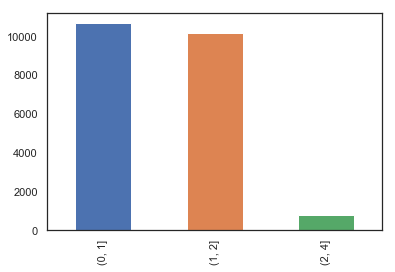

In [97]:
#for floors:
bins = [0,1,2,4]

#use pd.cut
bins_floors = pd.cut(df_cat['floors'], bins)

#order bins
bins_floors = bins_floors.cat.as_unordered()
bins_floors.head()

#plot bins based on frequency
bins_floors.value_counts().plot(kind = 'bar')

In [98]:
### create dummy columns for each bin 
floors_dummy = pd.get_dummies(bins_floors,prefix= 'floors')
df_cat = df_cat.drop(['floors'], axis =1 )
df_cat = pd.concat([df_cat, floors_dummy], axis = 1)
df_cat.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,"floors_(0, 1]","floors_(1, 2]","floors_(2, 4]"
0,221900.0,3,1.00,1180,5650,0.0,0.0,3,7,1180,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0,0
1,538000.0,3,2.25,2570,7242,0.0,0.0,3,7,2170,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1,0
2,180000.0,2,1.00,770,10000,0.0,0.0,3,6,770,...,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0,0
3,604000.0,4,3.00,1960,5000,0.0,0.0,5,7,1050,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0,0
4,510000.0,3,2.00,1680,8080,0.0,0.0,3,8,1680,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0,0


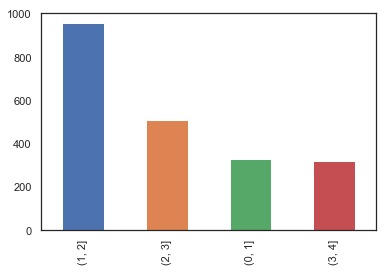

In [99]:
#binning categorical variables
#do same for view
bins = [0,1,2,3,4]

bins_view = pd.cut(df_cat['view'], bins)

bins_view = bins_view.cat.as_unordered()

bins_view.value_counts().plot(kind = 'bar')

In [100]:
view_dummy = pd.get_dummies(bins_view,prefix= 'view')
df_cat = df_cat.drop(['view'], axis =1 )
df_cat = pd.concat([df_cat, view_dummy], axis = 1)
df_cat.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,...,long,sqft_living15,sqft_lot15,"floors_(0, 1]","floors_(1, 2]","floors_(2, 4]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]"
0,221900.0,3,1.00,1180,5650,0.0,3,7,1180,0.0,...,-122.257,1340,5650,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,0.0,3,7,2170,400.0,...,-122.319,1690,7639,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,0.0,3,6,770,0.0,...,-122.233,2720,8062,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,0.0,5,7,1050,910.0,...,-122.393,1360,5000,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,0.0,3,8,1680,0.0,...,-122.045,1800,7503,1,0,0,0,0,0,0


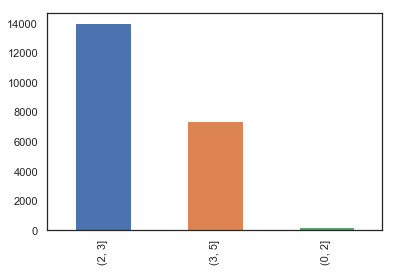

In [101]:
bins = [0,2,3,5]
bins_condition = pd.cut(df_cat['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()
bins_condition.value_counts().plot(kind = 'bar')

In [102]:
condition_dummy = pd.get_dummies(bins_condition,prefix= 'condition')
df_cat = df_cat.drop(['condition'], axis =1 )
df_cat = pd.concat([df_cat, condition_dummy], axis = 1)
df_cat.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,sqft_above,sqft_basement,yr_built,...,"floors_(0, 1]","floors_(1, 2]","floors_(2, 4]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]","condition_(0, 2]","condition_(2, 3]","condition_(3, 5]"
0,221900.0,3,1.00,1180,5650,0.0,7,1180,0.0,1955,...,1,0,0,0,0,0,0,0,1,0
1,538000.0,3,2.25,2570,7242,0.0,7,2170,400.0,1951,...,0,1,0,0,0,0,0,0,1,0
2,180000.0,2,1.00,770,10000,0.0,6,770,0.0,1933,...,1,0,0,0,0,0,0,0,1,0
3,604000.0,4,3.00,1960,5000,0.0,7,1050,910.0,1965,...,1,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,0.0,8,1680,0.0,1987,...,1,0,0,0,0,0,0,0,1,0


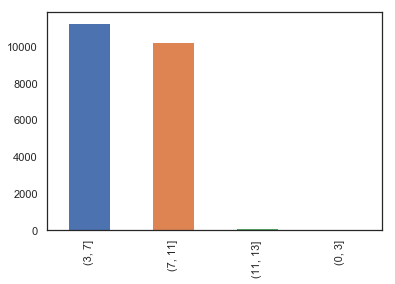

In [103]:
bins = [0,3,7,11,13]
bins_grade = pd.cut(df_cat['grade'], bins)
bins_grade = bins_grade.cat.as_unordered()
bins_grade.value_counts().plot(kind = 'bar')

In [104]:
grade_dummy = pd.get_dummies(bins_grade,prefix= 'grade')
df_cat = df_cat.drop(['grade'], axis =1 )
df_cat = pd.concat([df_cat, grade_dummy], axis = 1)
df_cat.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,"view_(1, 2]","view_(2, 3]","view_(3, 4]","condition_(0, 2]","condition_(2, 3]","condition_(3, 5]","grade_(0, 3]","grade_(3, 7]","grade_(7, 11]","grade_(11, 13]"
0,221900.0,3,1.00,1180,5650,0.0,1180,0.0,1955,0.0,...,0,0,0,0,1,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,0.0,2170,400.0,1951,1991.0,...,0,0,0,0,1,0,0,1,0,0
2,180000.0,2,1.00,770,10000,0.0,770,0.0,1933,0.0,...,0,0,0,0,1,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,0.0,1050,910.0,1965,0.0,...,0,0,0,0,0,1,0,1,0,0
4,510000.0,3,2.00,1680,8080,0.0,1680,0.0,1987,0.0,...,0,0,0,0,1,0,0,0,1,0


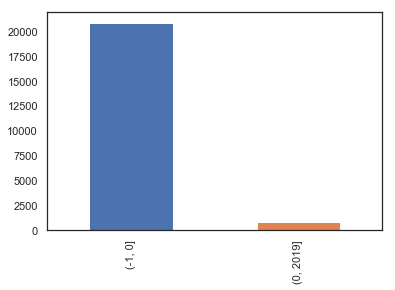

In [105]:
bins = [-1,0,2019]
bins_renovated = pd.cut(df_cat['yr_renovated'], bins)
bins_renovated = bins_renovated.cat.as_unordered()
bins_renovated.value_counts().plot(kind = 'bar')

In [106]:
renovated_dummy = pd.get_dummies(bins_renovated,prefix= 'renovated')
df_cat = df_cat.drop(['yr_renovated'], axis =1 )
df_cat = pd.concat([df_cat, renovated_dummy], axis = 1)
df_cat.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,zipcode,...,"view_(3, 4]","condition_(0, 2]","condition_(2, 3]","condition_(3, 5]","grade_(0, 3]","grade_(3, 7]","grade_(7, 11]","grade_(11, 13]","renovated_(-1, 0]","renovated_(0, 2019]"
0,221900.0,3,1.00,1180,5650,0.0,1180,0.0,1955,98178,...,0,0,1,0,0,1,0,0,1,0
1,538000.0,3,2.25,2570,7242,0.0,2170,400.0,1951,98125,...,0,0,1,0,0,1,0,0,0,1
2,180000.0,2,1.00,770,10000,0.0,770,0.0,1933,98028,...,0,0,1,0,0,1,0,0,1,0
3,604000.0,4,3.00,1960,5000,0.0,1050,910.0,1965,98136,...,0,0,0,1,0,1,0,0,1,0
4,510000.0,3,2.00,1680,8080,0.0,1680,0.0,1987,98074,...,0,0,1,0,0,0,1,0,1,0


Re-run correlation matrix to see which features are most correlated with the target variable with the new dataframe that includes category bins

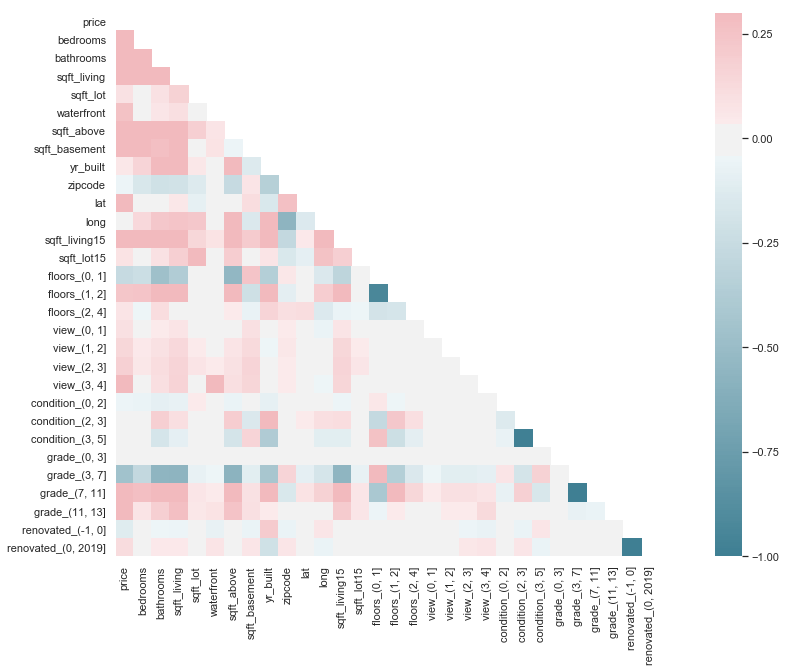

In [107]:
sns.set(style="white")

corr = df_cat.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (20,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask = mask, cmap = cmap, vmax=.3, center=0,square = True)

In [108]:
df_cat.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,zipcode,...,"view_(3, 4]","condition_(0, 2]","condition_(2, 3]","condition_(3, 5]","grade_(0, 3]","grade_(3, 7]","grade_(7, 11]","grade_(11, 13]","renovated_(-1, 0]","renovated_(0, 2019]"
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.264308,0.605392,0.321103,0.053965,-0.053409,...,0.303062,-0.055189,0.006966,0.004110,-0.005155,-0.454487,0.407018,0.347743,-0.117546,0.117546
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,-0.002054,0.492543,0.303517,0.160736,-0.158588,...,0.034126,-0.059495,0.007402,0.004538,-0.017852,-0.280356,0.270569,0.074009,-0.018354,0.018354
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.063628,0.686664,0.278504,0.507166,-0.204778,...,0.105787,-0.086686,0.190769,-0.174502,-0.012087,-0.556735,0.531993,0.183280,-0.046738,0.046738
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.104635,0.876448,0.428683,0.318140,-0.199793,...,0.166728,-0.071923,0.102034,-0.088184,-0.011565,-0.567606,0.530380,0.274177,-0.050825,0.050825
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,0.021458,0.184134,0.015038,0.052939,-0.129582,...,0.019229,0.037427,-0.011603,0.004136,-0.000348,-0.073200,0.064941,0.060429,-0.005089,0.005089
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,1.000000,0.071776,0.083053,-0.024491,0.028925,...,0.567871,0.003872,-0.017504,0.016834,-0.000561,-0.046675,0.036167,0.076735,-0.074267,0.074267
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.071776,1.000000,-0.051149,0.424017,-0.261557,...,0.106175,-0.063808,0.194193,-0.182557,-0.010429,-0.572615,0.538296,0.252915,-0.020558,0.020558
sqft_basement,0.321103,0.303517,0.278504,0.428683,0.015038,0.083053,-0.051149,1.000000,-0.130063,0.073257,...,0.148920,-0.030031,-0.146129,0.153097,-0.004420,-0.104566,0.091315,0.097285,-0.064681,0.064681
yr_built,0.053965,0.160736,0.507166,0.318140,0.052939,-0.024491,0.424017,-0.130063,1.000000,-0.347199,...,-0.020988,-0.081353,0.391390,-0.377457,-0.011815,-0.422690,0.416806,0.045475,0.202848,-0.202848
zipcode,-0.053409,-0.158588,-0.204778,-0.199793,-0.129582,0.028925,-0.261557,0.073257,-0.347199,1.000000,...,0.040858,0.026333,0.017734,-0.023151,-0.007115,0.157984,-0.153104,-0.035375,-0.062383,0.062383


In [109]:
### now that we've seen the correlation matrix, let's get the actual correlation coefficients of each attribute
df_cat.corr()['price'].sort_values(ascending = False)

price                  1.000000
sqft_living            0.701929
sqft_above             0.605392
sqft_living15          0.585267
bathrooms              0.525915
grade_(7, 11]          0.407018
grade_(11, 13]         0.347743
sqft_basement          0.321103
bedrooms               0.315961
lat                    0.306687
view_(3, 4]            0.303062
waterfront             0.264308
floors_(1, 2]          0.235520
view_(2, 3]            0.182934
view_(1, 2]            0.147182
renovated_(0, 2019]    0.117546
view_(0, 1]            0.092599
sqft_lot               0.089879
sqft_lot15             0.082849
floors_(2, 4]          0.076239
yr_built               0.053965
long                   0.022047
condition_(2, 3]       0.006966
condition_(3, 5]       0.004110
grade_(0, 3]          -0.005155
zipcode               -0.053409
condition_(0, 2]      -0.055189
renovated_(-1, 0]     -0.117546
floors_(0, 1]         -0.263539
grade_(3, 7]          -0.454487
Name: price, dtype: float64

In [110]:
### can also run cross-val score from sklearn package to assess how accurately the model will predict our target variable, price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

model = LinearRegression()
X = df_cat.drop(['price'], axis =1)
y = df_cat['price']

scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.70409614 0.69855751 0.69067504 0.70275978 0.68708437 0.68493863
 0.69862576 0.6993401  0.69968497 0.61989801]
Average cross-validation score: 0.69


In [111]:
### same as what we got above when we ran cross_val_score, ols tells us that our current model is 69% predictive of the 
### outcome or target variable

model = LinearRegression()

X = df_cat.drop(['price'], axis = 1)
y = pd.DataFrame(df_cat, columns = ['price'])

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1961.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:47   Log-Likelihood:            -2.9457e+05
No. Observations:               21596   AIC:                         5.892e+05
Df Residuals:                   21570   BIC:                         5.894e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.453e+05   1.23e+06      0.363      0.717   -1.96e+06    2.85e+06
bedrooms            -4.133e+04   1999.480    -20.669      0.000   -4.52e+04   -3.74e+04
bathrooms            5.183e+04   3279.213     15.806      0.000    4.54e+04    5.83e+04
sqft_living           139.3564     18.238      7.641      0.000     103.609     175.104
sqft_lot                0.1496      0.048      3.088      0.002       0.055       0.244
waterfront           5.389e+05   2.06e+04     26.160      0.000    4.98e+05    5.79e+05
sqft_above             79.9152     18.258      4.377      0.000      44.128     115.703
sqft_basement          27.8974     18.088      1.542      0.123      -7.556      63.350
yr_built            -2130.2788     71.510    -29.790      0.000   -2270.445   -1990.113
zipcode              -603.2853     33.440    -18.041      0.000    -668.830    -537.740
lat                  6.513e+05   1.08e+04     60.253      0.000     6.3e+05    6.72e+05
long                -2.586e+05   1.33e+04    -19.497      0.000   -2.85e+05   -2.33e+05
sqft_living15          60.2846      3.436     17.544      0.000      53.549      67.020
sqft_lot15             -0.4676      0.074     -6.315      0.000      -0.613      -0.322
floors_(0, 1]        1.178e+05   4.09e+05      0.288      0.773   -6.83e+05    9.19e+05
floors_(1, 2]         1.21e+05   4.09e+05      0.296      0.767   -6.81e+05    9.23e+05
floors_(2, 4]        2.064e+05    4.1e+05      0.503      0.615   -5.97e+05    1.01e+06
view_(0, 1]          1.169e+05   1.15e+04     10.206      0.000    9.44e+04    1.39e+05
view_(1, 2]          8.143e+04   6961.908     11.697      0.000    6.78e+04    9.51e+04
view_(2, 3]          1.585e+05   9531.793     16.631      0.000     1.4e+05    1.77e+05
view_(3, 4]          2.905e+05   1.44e+04     20.196      0.000    2.62e+05    3.19e+05
condition_(0, 2]     1.227e+05   4.09e+05      0.300      0.764    -6.8e+05    9.25e+05
condition_(2, 3]     1.451e+05    4.1e+05      0.354      0.723   -6.58e+05    9.48e+05
condition_(3, 5]     1.775e+05   4.09e+05      0.434      0.664   -6.24e+05    9.79e+05
grade_(0, 3]         7.239e+04   3.43e+05      0.211      0.833      -6e+05    7.45e+05
grade_(3, 7]        -1.619e+05   3.11e+05     -0.521      0.603   -7.71e+05    4.48e+05
grade_(7, 11]       -1.098e+05   3.11e+05     -0.353      0.724    -7.2e+05       5e+05
grade_(11, 13]       6.446e+05   3.12e+05      2.069      0.039    3.38e+04    1.26e+06
renovated_(-1, 0]    1.942e+05   6.14e+05      0.316      0.752   -1.01e+06     1.4e+06
renovated_(0, 2019]  2.511e+05   6.14e+05      0.409      0.682   -9.52e+05    1.45e+06
==============================================================================
Omnibus:                    14445.223   Durbin-Watson:                   1.987
Prob(Omnibus):       

In [112]:
### looking at the p-values, predictors that don't contribute significantly to the model outcome (i.e., p-value > 0.05)
### appear to be sqft_basement, floors, condition, grade (excluding 11-13), and yr_renovated... let's drop it and see what happens to the adjusted r-squared

model = LinearRegression()

X = df_cat.drop(['price','floors_(0, 1]', 'floors_(1, 2]','floors_(2, 4]','condition_(0, 2]','condition_(2, 3]','condition_(3, 5]',
            'grade_(0, 3]','grade_(3, 7]','grade_(7, 11]','renovated_(-1, 0]','renovated_(0, 2019]','sqft_basement'], axis = 1)
y = pd.DataFrame(df_cat, columns = ['price'])

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2792.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:47   Log-Likelihood:            -2.9482e+05
No. Observations:               21596   AIC:                         5.897e+05
Df Residuals:                   21578   BIC:                         5.898e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.478e+05   2.89e+06     -0.293      0.770   -6.52e+06    4.83e+06
bedrooms        -4.44e+04   2009.638    -22.093      0.000   -4.83e+04   -4.05e+04
bathrooms       6.454e+04   3164.791     20.395      0.000    5.83e+04    7.07e+04
sqft_living      168.5339      4.232     39.824      0.000     160.239     176.829
sqft_lot           0.1518      0.049      3.102      0.002       0.056       0.248
waterfront      5.371e+05   2.08e+04     25.807      0.000    4.96e+05    5.78e+05
sqft_above        60.4048      3.885     15.549      0.000      52.790      68.019
yr_built       -2134.5179     63.370    -33.684      0.000   -2258.727   -2010.309
zipcode         -646.3420     33.302    -19.408      0.000    -711.617    -581.067
lat             6.749e+05   1.08e+04     62.778      0.000    6.54e+05    6.96e+05
long            -2.97e+05   1.32e+04    -22.476      0.000   -3.23e+05   -2.71e+05
sqft_living15     64.4775      3.364     19.169      0.000      57.885      71.071
sqft_lot15        -0.4792      0.075     -6.406      0.000      -0.626      -0.333
view_(0, 1]     1.214e+05   1.16e+04     10.491      0.000    9.87e+04    1.44e+05
view_(1, 2]     8.928e+04   7025.216     12.708      0.000    7.55e+04    1.03e+05
view_(2, 3]     1.697e+05   9623.106     17.634      0.000    1.51e+05    1.89e+05
view_(3, 4]     3.064e+05   1.45e+04     21.098      0.000    2.78e+05    3.35e+05
grade_(11, 13]  7.171e+05   2.15e+04     33.397      0.000    6.75e+05    7.59e+05
==============================================================================
Omnibus:                    13805.319   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           629486.246
Skew:                           2.462   Prob(JB):                         0.00
Kurtosis:                      28.987   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [114]:
### going to run recursive feature elimination to help us select which features we want to include in our model and which 
### to exclude. In the first instance i'd like to select the five top features and go from there

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)

In [115]:
Y = df_cat['price']
X = df_cat.drop(['price','floors_(0, 1]', 'floors_(1, 2]','floors_(2, 4]','condition_(0, 2]','condition_(2, 3]','condition_(3, 5]',
            'grade_(0, 3]','grade_(3, 7]','grade_(7, 11]','renovated_(-1, 0]','renovated_(0, 2019]','sqft_basement'], axis = 1)

In [116]:
selector = selector.fit(X,Y)

In [117]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'view_(0, 1]', 'view_(1, 2]', 'view_(2, 3]',
       'view_(3, 4]', 'grade_(11, 13]'],
      dtype='object')

In [118]:
### run ranking to help us show which columns are most important from 1 being the most to 21 being the least
selector.ranking_

array([ 6,  3,  9, 13,  1, 11,  7,  8,  1,  5, 10, 12,  2,  4,  1,  1,  1])

In [119]:
### important to note that to run RFE properly have to scale all the predictors to the same scale, otherwise a column with 
### greater magnitude may falsely be attributed more weight in predicting the outcome... storing the rankings i just ran 
### as a variable to later compare the differences between scaled vs non-scaled

no_scale = selector.ranking_

In [120]:
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
linreg.coef_

array([-4.43984931e+04,  6.45444294e+04,  1.68533904e+02,  1.51766661e-01,
        5.37133143e+05,  6.04048111e+01, -2.13451790e+03, -6.46342016e+02,
        6.74920316e+05, -2.96993752e+05,  6.44775305e+01, -4.79181242e-01,
        1.21431334e+05,  8.92772360e+04,  1.69690709e+05,  3.06417255e+05,
        7.17133916e+05])

In [122]:
### scale the predictors using MinMaxScaler and store data as new variable scaled_data

scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [123]:
scaled_data

array([[0.2       , 0.06666667, 0.06150342, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.23333333, 0.16704632, ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.06666667, 0.03037206, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1       , 0.03333333, 0.04935459, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.26666667, 0.09339408, ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.03333333, 0.04935459, ..., 0.        , 0.        ,
        0.        ]])

In [124]:
linreg.fit(scaled_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
selector = selector.fit(scaled_data,Y)

In [126]:
selector.ranking_

array([ 5,  8,  1,  3,  1,  7,  9, 11,  1,  2,  1,  4, 12, 13, 10,  6,  1])

In [127]:
### create new variable that stores ranking of the scaled data into scaled

scaled = selector.ranking_

In [128]:
### plot scaled vs non-scaled side by side to see the difference in rankings

features = pd.DataFrame({'Columns': X.columns,
                       'Not_Scaled': no_scale,
                         'Scaled': scaled})

Text(0, 0.5, 'Features Importance')

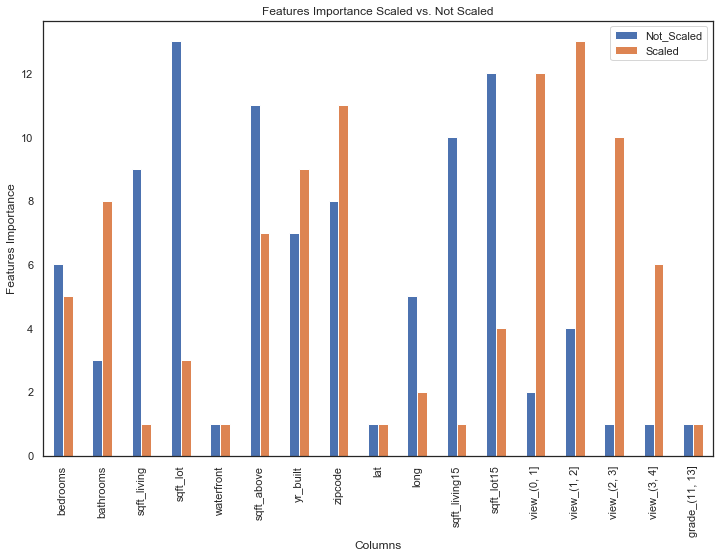

In [129]:
ax = features.set_index('Columns').plot(kind = 'bar',figsize = (12,8))
ax.set_title('Features Importance Scaled vs. Not Scaled')
ax.set_ylabel('Features Importance')

In [130]:
### call the features dataframe to see how the rankings of each column has changed from non-scaled to scaled

features.sort_values('Scaled',ascending = True)

,Columns,Not_Scaled,Scaled
8,lat,1,1
10,sqft_living15,10,1
4,waterfront,1,1
16,"grade_(11, 13]",1,1
2,sqft_living,9,1
9,long,5,2
3,sqft_lot,13,3
11,sqft_lot15,12,4
0,bedrooms,6,5
15,"view_(3, 4]",1,6


In [131]:
### now i want to run a for loop to see how my r-squared changes as i add more predictors. create an empty list and append
### the new r-squared as we iterate through all the columns and add an additional predictor to the model we can expect the 
### r-squared to increase as we add more variables (typical for r-squared and also one of the negatives)

r_squared = []

for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data,Y)
    linreg.fit(X[X.columns[selector.support_]],Y)
    r_sq = linreg.score(X[X.columns[selector.support_]],Y)
    r_squared.append(r_sq)

In [132]:
r_squared

[0.49270416095391417,
 0.518779463311213,
 0.5526483185493963,
 0.6270467378796354,
 0.6334377465985639,
 0.6469255696347799,
 0.6470518311371781,
 0.6475011407636704,
 0.6528790293316171,
 0.657624391260901,
 0.6580301849247895,
 0.6587514600279234,
 0.6756137736611405,
 0.6788364978104753,
 0.6837598418517689,
 0.6851129296483107]

In [133]:
len(X.columns)

17

Text(0.5, 0, 'Number of Features')

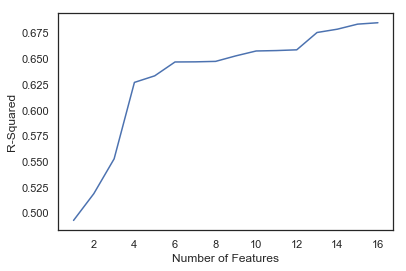

In [134]:
### plot the r-squared's to see at how many variables the r-squared begins to plateau. this is referred to as an elbow method
### from the plot below we can see that after 4-5 features, the r-squared kind of flattens 

plt.plot(range(1,len(X.columns)), r_squared)
plt.ylabel('R-Squared')
plt.xlabel('Number of Features')

In [135]:
### do the same for MSE. import MSe from sklearn package and run a for loop iterating through each column and calculating
### the new MSE as we add an additional predictor to the model 
from sklearn.metrics import mean_squared_error

In [136]:
mse = []

for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data,Y)
    linreg.fit(X[X.columns[selector.support_]],Y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(Y,y_pred))

In [137]:
mse

[68464083356.53534,
 64944989493.09289,
 60374086383.42485,
 50333358290.33041,
 49470834847.42607,
 47650533221.483116,
 47633493109.26542,
 47572854780.79242,
 46847060908.93571,
 46206632130.149864,
 46151866667.68864,
 46054524180.36052,
 43778805049.01605,
 43343869774.936005,
 42679420727.86743,
 42496809500.72758]

Text(0.5, 0, 'Number of Features')

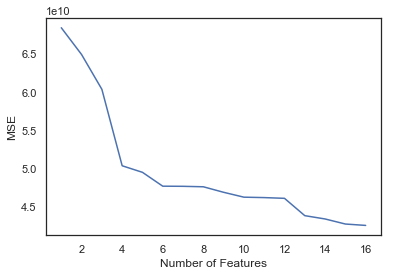

In [138]:
plt.plot(range(1, len(X.columns)),mse)
plt.ylabel('MSE')
plt.xlabel('Number of Features')

In [139]:
### similar to the r_squared (but in reverse) ideal number of features to use would be when the plot begins to platue
### in this case it's between 4-5. knowing what we know about linear regression 
### fewer features we use is better for interpretability

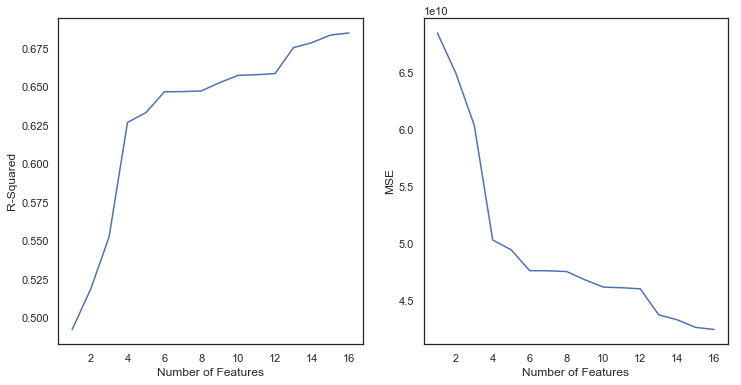

In [140]:
### plot the above graphs side by side so that we can have a better visualization of them 

fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(121)
ax1.plot(range(1,len(X.columns)), r_squared)
ax1.set_ylabel('R-Squared')
ax1.set_xlabel('Number of Features')

ax2 = plt.subplot(122)
ax2.plot(range(1, len(X.columns)),mse)
ax2.set_ylabel('MSE')
ax2.set_xlabel('Number of Features');

In [141]:
### call the features dataframe again to see which scaled features fall within the top 5

features.sort_values('Scaled',ascending=True)

,Columns,Not_Scaled,Scaled
8,lat,1,1
10,sqft_living15,10,1
4,waterfront,1,1
16,"grade_(11, 13]",1,1
2,sqft_living,9,1
9,long,5,2
3,sqft_lot,13,3
11,sqft_lot15,12,4
0,bedrooms,6,5
15,"view_(3, 4]",1,6


In [142]:
### run ols model on the top 5 features to see how this affects our r-squared

model = LinearRegression()

X_5 =df_cat[['lat','sqft_living15','waterfront','grade_(11, 13]','sqft_living']]
Y = pd.DataFrame(df_cat, columns = ['price'])

X_int = sm.add_constant(X_5)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     7462.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:27:52   Log-Likelihood:            -2.9654e+05
No. Observations:               21596   AIC:                         5.931e+05
Df Residuals:                   21590   BIC:                         5.931e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.435e+07    5.2e+05    -66.017      0.000   -3.54e+07   -3.33e+07
lat             7.213e+05   1.09e+04     65.910      0.000       7e+05    7.43e+05
sqft_living15     65.5403      3.378     19.402      0.000      58.919      72.162
waterfront        8.5e+05   1.86e+04     45.693      0.000    8.14e+05    8.86e+05
grade_(11, 13]  8.433e+05    2.3e+04     36.682      0.000    7.98e+05    8.88e+05
sqft_living      212.9846      2.573     82.767      0.000     207.941     218.028
==============================================================================
Omnibus:                    14530.754   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           573703.782
Skew:                           2.715   Prob(JB):                         0.00
Kurtosis:                      27.659   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

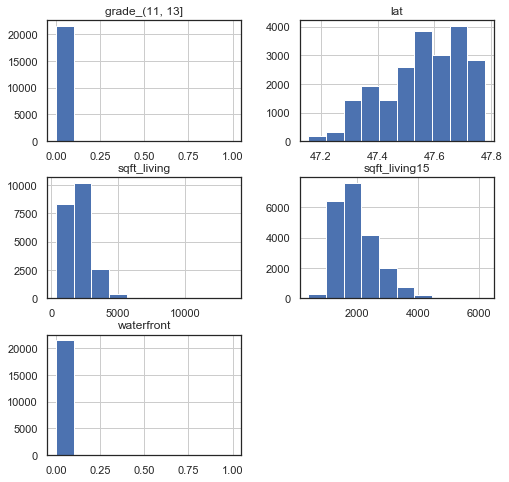

In [143]:
### r-squared was lowered from 69% to 63%.... let's take a look at histograms of the top_5 features to check for skewness
### kurtosis 

X_5.hist(figsize = (8,8));

In [144]:
### lat and sqft_living look to be most skewed. let's try and normalize this by taking the log

df_cat['log_sqft_living'] = np.log(df_cat['sqft_living'])
df_cat['log_sqft_living15'] = np.log(df_cat['sqft_living15'])
df_cat['log_lat'] = np.log(df_cat['lat'])

In [145]:
### also price is fairly positively skewed do to the outliers (as we've seen from the boxplot, scatter plot and histogram
### earlier). let's also try and normalize the dependent variable to see if it helps our outcome 

df_cat['log_price'] = np.log(df_cat['price'])

In [146]:
### run a correlation table to see how the features correlate with each other (log vs. non-logged) to see whether the 
### log-normalized version or the original version is better to use in our model

df_cat[['price','log_price','sqft_living','log_sqft_living','lat','log_lat','sqft_living15','log_sqft_living15']].corr()

,price,log_price,sqft_living,log_sqft_living,lat,log_lat,sqft_living15,log_sqft_living15
price,1.000000,0.891746,0.701929,0.611846,0.306687,0.306949,0.585267,0.543857
log_price,0.891746,1.000000,0.695209,0.674820,0.448824,0.449120,0.619371,0.607205
sqft_living,0.701929,0.695209,1.000000,0.954607,0.052178,0.052276,0.756400,0.732179
log_sqft_living,0.611846,0.674820,0.954607,1.000000,0.038837,0.038898,0.737217,0.746839
lat,0.306687,0.448824,0.052178,0.038837,1.000000,0.999999,0.048721,0.043648
log_lat,0.306949,0.449120,0.052276,0.038898,0.999999,1.000000,0.048816,0.043710
sqft_living15,0.585267,0.619371,0.756400,0.737217,0.048721,0.048816,1.000000,0.976818
log_sqft_living15,0.543857,0.607205,0.732179,0.746839,0.043648,0.043710,0.976818,1.000000


In [147]:
### now normalize using min-max scalar so that each predictor is on same magnitude. 
### chose min-max scalar because of categorical columns (0 or 1)

df_cat['log_price'] = (df_cat['log_price'] - min(df_cat['log_price'])) / (max(df_cat['log_price']) - min(df_cat['log_price']))
df_cat['log_sqft_living'] = (df_cat['log_sqft_living'] - min(df_cat['log_sqft_living'])) / (max(df_cat['log_sqft_living']) - min(df_cat['log_sqft_living']))
df_cat['log_sqft_living15'] = (df_cat['log_sqft_living15'] - min(df_cat['log_sqft_living15'])) / (max(df_cat['log_sqft_living15']) - min(df_cat['log_sqft_living15']))
df_cat['log_lat'] = (df_cat['log_lat'] - min(df_cat['log_lat'])) / (max(df_cat['log_lat']) - min(df_cat['log_lat']))
df_cat['sqft_living'] = (df_cat['sqft_living'] - min(df_cat['sqft_living'])) / (max(df_cat['sqft_living']) - min(df_cat['sqft_living']))
df_cat['sqft_living15'] = (df_cat['sqft_living15'] - min(df_cat['sqft_living15'])) / (max(df_cat['sqft_living15']) - min(df_cat['sqft_living15']))

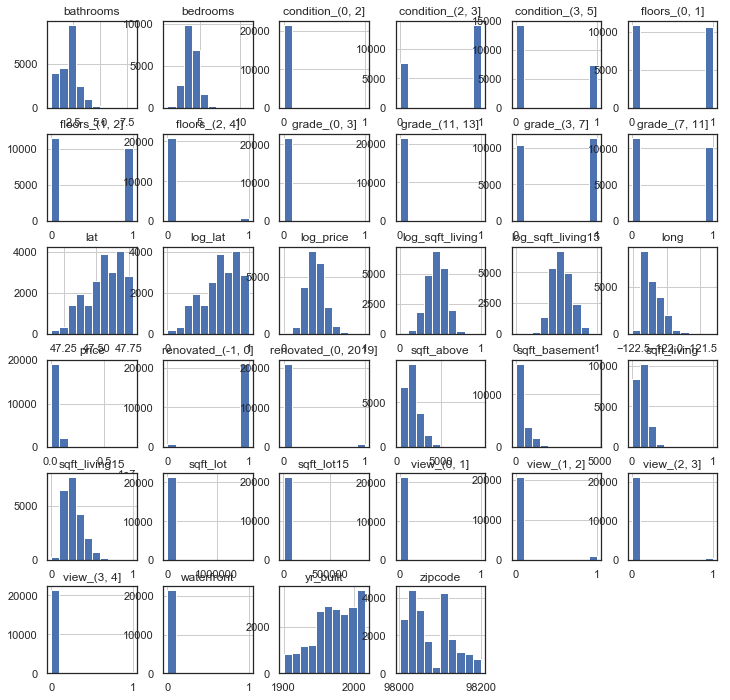

In [148]:
df_cat.hist(figsize = (12,12));

In [149]:
### looks like using the log_price will increase our r-squared so use that for target variable
### comparing the features with the log_features, decided that sqft_living and log_lat will be used

model = LinearRegression()

X_5 =df_cat[['sqft_living','waterfront','log_lat','sqft_living15','grade_(11, 13]']]
Y = pd.DataFrame(df_cat, columns = ['log_price'])

X_int = sm.add_constant(X_5)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     9345.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:28:00   Log-Likelihood:                 28567.
No. Observations:               21596   AIC:                        -5.712e+04
Df Residuals:                   21590   BIC:                        -5.707e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0856      0.002     51.184      0.000       0.082       0.089
sqft_living        0.8284      0.010     84.345      0.000       0.809       0.848
waterfront         0.1472      0.005     27.312      0.000       0.137       0.158
log_lat            0.2132      0.002    107.977      0.000       0.209       0.217
sqft_living15      0.2028      0.006     35.644      0.000       0.192       0.214
grade_(11, 13]     0.0072      0.007      1.084      0.278      -0.006       0.020
==============================================================================
Omnibus:                      255.925   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.224
Skew:                           0.078   Prob(JB):                     1.03e-93
Kurtosis:                       3.672   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The log normalizations increased our r-squared from 63% to 68%, which is better but not good enough. Though RFE did tell me the top 5 features that are most predictive of the price, i also revisited our correlatin matrix from earlier... if i decide that a tolerance value of less than 0.1 should be investigated further and anything above 0.1 be included in our model, how will that change my outcome... 

As we can see from running ols model on top 5 vs. all features, all features has higher r-squared and there are only a couple of features that have a tolerance less than 0.1 --- using tolerance calc (1-r2) which signifies collinearity between variables. a tolerance of 0 would be considered perfectly correlated and should be removed from model. 

My tolerance for this project is 0.1 with that in mind, im going to normalize all the remaining features and run a similar comparison between log_features and original_features to help decide which to include in my model 

In [150]:
df_cat['log_bedrooms'] = np.log(df_cat['bedrooms'])
df_cat['log_bathrooms'] = np.log(df_cat['bathrooms'])
df_cat['log_sqft_above'] = np.log(df_cat['sqft_above'])
df_cat['log_sqft_living15'] = np.log(df_cat['sqft_living15'])
df_cat['log_sqft_lot'] = np.log(df_cat['sqft_lot'])
df_cat['log_sqft_lot15'] = np.log(df_cat['sqft_lot15'])
df_cat['log_yrbuilt'] = np.log(df_cat['yr_built'])
df_cat['log_zipcode'] = np.log(df_cat['zipcode'])
df_cat['sqft_basement'] = df_cat.sqft_basement

df_cat['log_bedrooms'] = (df_cat['log_bedrooms'] - min(df_cat['log_bedrooms'])) / (max(df_cat['log_bedrooms']) - min(df_cat['log_bedrooms']))
df_cat['log_bathrooms'] = (df_cat['log_bathrooms'] - min(df_cat['log_bathrooms'])) / (max(df_cat['log_bathrooms']) - min(df_cat['log_bathrooms']))
df_cat['log_sqft_above'] = (df_cat['log_sqft_above'] - min(df_cat['log_sqft_above'])) / (max(df_cat['log_sqft_above']) - min(df_cat['log_sqft_above']))
df_cat['log_sqft_living15'] = (df_cat['log_sqft_living15'] - min(df_cat['log_sqft_living15'])) / (max(df_cat['log_sqft_living15']) - min(df_cat['log_sqft_living15']))
df_cat['log_sqft_lot'] = (df_cat['log_sqft_lot'] - min(df_cat['log_sqft_lot'])) / (max(df_cat['log_sqft_lot']) - min(df_cat['log_sqft_lot']))
df_cat['log_sqft_lot15'] = (df_cat['log_sqft_lot15'] - min(df_cat['log_sqft_lot15'])) / (max(df_cat['log_sqft_lot15']) - min(df_cat['log_sqft_lot15']))
df_cat['log_yrbuilt'] = (df_cat['log_yrbuilt'] - min(df_cat['log_yrbuilt'])) / (max(df_cat['log_yrbuilt']) - min(df_cat['log_yrbuilt']))
df_cat['log_zipcode'] = (df_cat['log_zipcode'] - min(df_cat['log_zipcode'])) / (max(df_cat['log_zipcode']) - min(df_cat['log_zipcode']))
df_cat['sqft_basement'] = (df_cat['sqft_basement'] - min(df_cat['sqft_basement'])) / (max(df_cat['sqft_basement']) - min(df_cat['sqft_basement']))
df_cat['bedrooms'] = (df_cat['bedrooms'] - min(df_cat['bedrooms'])) / (max(df_cat['bedrooms']) - min(df_cat['bedrooms']))
df_cat['bathrooms'] = (df_cat['bathrooms'] - min(df_cat['bathrooms'])) / (max(df_cat['bathrooms']) - min(df_cat['bathrooms']))
df_cat['sqft_above'] = (df_cat['sqft_above'] - min(df_cat['sqft_above'])) / (max(df_cat['sqft_above']) - min(df_cat['sqft_above']))
df_cat['sqft_living15'] = (df_cat['sqft_living15'] - min(df_cat['sqft_living15'])) / (max(df_cat['sqft_living15']) - min(df_cat['sqft_living15']))
df_cat['sqft_lot'] = (df_cat['sqft_lot'] - min(df_cat['sqft_lot'])) / (max(df_cat['sqft_lot']) - min(df_cat['sqft_lot']))
df_cat['sqft_lot15'] = (df_cat['sqft_lot15'] - min(df_cat['sqft_lot15'])) / (max(df_cat['sqft_lot15']) - min(df_cat['sqft_lot15']))
df_cat['yr_built'] = (df_cat['yr_built'] - min(df_cat['yr_built'])) / (max(df_cat['yr_built']) - min(df_cat['yr_built']))
df_cat['zipcode'] = (df_cat['zipcode'] - min(df_cat['zipcode'])) / (max(df_cat['zipcode']) - min(df_cat['zipcode']))



df_cat[['price','log_price','lat','log_lat','yr_built','log_yrbuilt','zipcode','log_zipcode','sqft_living','log_sqft_living',
              'sqft_living15','log_sqft_living15','sqft_lot','log_sqft_lot','sqft_lot15','log_sqft_lot15',
              'sqft_above','log_sqft_above','bedrooms','log_bedrooms','bathrooms','log_bathrooms']].corr()

,price,log_price,lat,log_lat,yr_built,log_yrbuilt,zipcode,log_zipcode,sqft_living,log_sqft_living,...,sqft_lot,log_sqft_lot,sqft_lot15,log_sqft_lot15,sqft_above,log_sqft_above,bedrooms,log_bedrooms,bathrooms,log_bathrooms
price,1.000000,0.891746,0.306687,0.306949,0.053965,0.052719,-0.053409,-0.053400,0.701929,0.611846,...,0.089879,0.161566,0.082849,0.147923,0.605392,0.542703,0.315961,0.299207,0.525915,0.456127
log_price,0.891746,1.000000,0.448824,0.449120,0.080608,0.079011,-0.038801,-0.038771,0.695209,0.674820,...,0.100032,0.138271,0.092290,0.123730,0.601621,0.586062,0.350871,0.343155,0.551270,0.520292
lat,0.306687,0.448824,1.000000,0.999999,-0.148340,-0.148808,0.266729,0.266788,0.052178,0.038837,...,-0.085507,-0.149171,-0.086129,-0.143518,-0.001160,-0.019080,-0.011595,-0.027176,0.024301,0.011300
log_lat,0.306949,0.449120,0.999999,1.000000,-0.148452,-0.148921,0.266972,0.267030,0.052276,0.038898,...,-0.085629,-0.149383,-0.086271,-0.143738,-0.001116,-0.019074,-0.011562,-0.027169,0.024375,0.011343
yr_built,0.053965,0.080608,-0.148340,-0.148452,1.000000,0.999968,-0.347199,-0.347200,0.318140,0.349681,...,0.052939,-0.007300,0.070767,0.018736,0.424017,0.451375,0.160736,0.194921,0.507166,0.534299
log_yrbuilt,0.052719,0.079011,-0.148808,-0.148921,0.999968,1.000000,-0.348048,-0.348050,0.317275,0.348965,...,0.053415,-0.004433,0.071462,0.021642,0.422498,0.450002,0.160791,0.195144,0.505593,0.532916
zipcode,-0.053409,-0.038801,0.266729,0.266972,-0.347199,-0.348048,1.000000,1.000000,-0.199793,-0.222122,...,-0.129582,-0.281684,-0.147288,-0.280086,-0.261557,-0.290326,-0.158588,-0.180326,-0.204778,-0.227631
log_zipcode,-0.053400,-0.038771,0.266788,0.267030,-0.347200,-0.348050,1.000000,1.000000,-0.199797,-0.222127,...,-0.129583,-0.281722,-0.147292,-0.280126,-0.261551,-0.290323,-0.158600,-0.180339,-0.204771,-0.227624
sqft_living,0.701929,0.695209,0.052178,0.052276,0.318140,0.317275,-0.199793,-0.199797,1.000000,0.954607,...,0.173449,0.344665,0.184337,0.321010,0.876448,0.843135,0.593178,0.580764,0.755755,0.708155
log_sqft_living,0.611846,0.674820,0.038837,0.038898,0.349681,0.348965,-0.222122,-0.222127,0.954607,1.000000,...,0.150098,0.325979,0.162886,0.303051,0.832383,0.864986,0.637670,0.649276,0.762133,0.760763


In [151]:
### after carefully comparing the original and normalized features, I selected the one that had a higher coef
### the final list of features are now stored in X_all (doesn't exclude any)

model = LinearRegression()

X_all =df_cat[['sqft_living','waterfront','log_lat','grade_(3, 7]','grade_(7, 11]','bedrooms','bathrooms','sqft_above',
           'sqft_basement','long','sqft_living15','log_sqft_lot','log_sqft_lot15','yr_built','zipcode',
           'grade_(0, 3]','grade_(11, 13]','floors_(0, 1]','floors_(1, 2]','floors_(2, 4]','view_(0, 1]',
           'view_(1, 2]','view_(2, 3]','view_(3, 4]','condition_(0, 2]','condition_(2, 3]','condition_(3, 5]',
           'renovated_(-1, 0]','renovated_(0, 2019]']]
Y = pd.DataFrame(df_cat, columns = ['log_price'])

X_int = sm.add_constant(X_all)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     2600.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:28:01   Log-Likelihood:                 31135.
No. Observations:               21596   AIC:                        -6.222e+04
Df Residuals:                   21570   BIC:                        -6.201e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.0142      0.193    -10.443      0.000      -2.392      -1.636
sqft_living             0.5358      0.068      7.915      0.000       0.403       0.668
waterfront              0.0851      0.006     14.637      0.000       0.074       0.096
log_lat                 0.1970      0.002    103.327      0.000       0.193       0.201
grade_(3, 7]           -0.5476      0.050    -10.948      0.000      -0.646      -0.450
grade_(7, 11]          -0.5078      0.050    -10.135      0.000      -0.606      -0.410
bedrooms               -0.0658      0.006    -11.715      0.000      -0.077      -0.055
bathrooms               0.1241      0.007     17.810      0.000       0.110       0.138
sqft_above              0.0953      0.047      2.047      0.041       0.004       0.187
sqft_basement           0.0132      0.025      0.536      0.592      -0.035       0.061
long                   -0.0415      0.004    -10.910      0.000      -0.049      -0.034
sqft_living15           0.1752      0.006     30.817      0.000       0.164       0.186
log_sqft_lot            0.0251      0.009      2.724      0.006       0.007       0.043
log_sqft_lot15         -0.0695      0.009     -7.784      0.000      -0.087      -0.052
yr_built               -0.0742      0.002    -31.731      0.000      -0.079      -0.070
zipcode                -0.0306      0.002    -16.410      0.000      -0.034      -0.027
grade_(0, 3]           -0.4667      0.065     -7.175      0.000      -0.594      -0.339
grade_(11, 13]         -0.4922      0.051     -9.745      0.000      -0.591      -0.393
floors_(0, 1]          -0.6824      0.064    -10.616      0.000      -0.808      -0.556
floors_(1, 2]          -0.6716      0.064    -10.460      0.000      -0.797      -0.546
floors_(2, 4]          -0.6601      0.064    -10.247      0.000      -0.786      -0.534
view_(0, 1]             0.0375      0.003     11.619      0.000       0.031       0.044
view_(1, 2]             0.0297      0.002     15.153      0.000       0.026       0.034
view_(2, 3]             0.0444      0.003     16.530      0.000       0.039       0.050
view_(3, 4]             0.0616      0.004     15.192      0.000       0.054       0.070
condition_(0, 2]       -0.7024      0.064    -10.913      0.000      -0.829      -0.576
condition_(2, 3]       -0.6637      0.064    -10.323      0.000      -0.790      -0.538
condition_(3, 5]       -0.6481      0.064    -10.077      0.000      -0.774      -0.522
renovated_(-1, 0]      -1.0155      0.096    -10.526      0.000      -1.205      -0.826
renovated_(0, 2019]    -0.9987      0.096    -10.357      0.000      -1.188      -0.810
==============================================================================
Omnibus:                      426.207   Durbin-Watson:                   1.994
Prob(Omnibus):       

In [152]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)

Y = df_cat['log_price']
X = df_cat[['sqft_living','waterfront','log_lat','grade_(3, 7]','grade_(7, 11]','bedrooms','bathrooms','sqft_above',
           'sqft_basement','long','sqft_living15','log_sqft_lot','log_sqft_lot15','yr_built','zipcode',
           'grade_(0, 3]','grade_(11, 13]','floors_(0, 1]','floors_(1, 2]','floors_(2, 4]','view_(0, 1]',
           'view_(1, 2]','view_(2, 3]','view_(3, 4]','condition_(0, 2]','condition_(2, 3]','condition_(3, 5]',
           'renovated_(-1, 0]','renovated_(0, 2019]']]


scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

linreg.fit(scaled_data,Y)
selector = selector.fit(scaled_data,Y)

selector.ranking_

scaled = selector.ranking_

features = pd.DataFrame({'Columns': X.columns,
                       'Scaled': scaled})

C:\Users\Lenovo\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [153]:
features.sort_values('Scaled',ascending = True)

,Columns,Scaled
0,sqft_living,1
1,waterfront,1
2,log_lat,1
10,sqft_living15,1
12,log_sqft_lot15,1
6,bathrooms,2
5,bedrooms,3
7,sqft_above,4
13,yr_built,5
23,"view_(3, 4]",6


In [154]:
### creating a new dataframe of just the predictors excluding the dependent var

df_features = df_cat[['sqft_living','waterfront','log_lat','grade_(3, 7]','grade_(7, 11]','bedrooms','bathrooms','sqft_above',
           'sqft_basement','long','sqft_living15','log_sqft_lot','log_sqft_lot15','log_yrbuilt','zipcode',
           'grade_(0, 3]','grade_(11, 13]','floors_(0, 1]','floors_(1, 2]','floors_(2, 4]','view_(0, 1]',
           'view_(1, 2]','view_(2, 3]','view_(3, 4]','condition_(0, 2]','condition_(2, 3]','condition_(3, 5]',
           'renovated_(-1, 0]','renovated_(0, 2019]']]

In [155]:
abs(df_features.corr())>0.9

,sqft_living,waterfront,log_lat,"grade_(3, 7]","grade_(7, 11]",bedrooms,bathrooms,sqft_above,sqft_basement,long,...,"floors_(2, 4]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]","condition_(0, 2]","condition_(2, 3]","condition_(3, 5]","renovated_(-1, 0]","renovated_(0, 2019]"
sqft_living,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
log_lat,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"grade_(3, 7]",False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"grade_(7, 11]",False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [156]:
### checking for multicollinearity - looking for coef greater than 0.9 to remove from model 
### removed yr_renovated cols, also removed sqft_basement, which had a p-value of 0.592 from previous ols model summary
### i chose the top 13 features instead of 5 because looking at the plots of the RFE, there's a pop from 12 to 13 before it plateaus again
          
model = LinearRegression()

X_final = df_cat[['sqft_living','waterfront','log_lat','grade_(3, 7]','bedrooms','bathrooms','sqft_above',
           'sqft_living15','log_sqft_lot15','yr_built','view_(2, 3]','view_(3, 4]','condition_(0, 2]']]
Y = pd.DataFrame(df_cat, columns = ['log_price'])

X_int = sm.add_constant(X_final)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     4685.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:28:01   Log-Likelihood:                 30606.
No. Observations:               21596   AIC:                        -6.118e+04
Df Residuals:                   21582   BIC:                        -6.107e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2101      0.003     74.778      0.000       0.205       0.216
sqft_living          0.5848      0.016     37.218      0.000       0.554       0.616
waterfront           0.0902      0.006     15.165      0.000       0.079       0.102
log_lat              0.1864      0.002     98.943      0.000       0.183       0.190
grade_(3, 7]        -0.0436      0.001    -40.452      0.000      -0.046      -0.041
bedrooms            -0.0659      0.006    -11.611      0.000      -0.077      -0.055
bathrooms            0.1497      0.007     21.565      0.000       0.136       0.163
sqft_above           0.0818      0.010      8.266      0.000       0.062       0.101
sqft_living15        0.1828      0.006     32.376      0.000       0.172       0.194
log_sqft_lot15      -0.0593      0.004    -14.596      0.000      -0.067      -0.051
yr_built            -0.0925      0.002    -45.748      0.000      -0.096      -0.089
view_(2, 3]          0.0385      0.003     14.155      0.000       0.033       0.044
view_(3, 4]          0.0561      0.004     13.629      0.000       0.048       0.064
condition_(0, 2]    -0.0480      0.004    -11.422      0.000      -0.056      -0.040
==============================================================================
Omnibus:                      449.592   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              994.606
Skew:                          -0.019   Prob(JB):                    1.06e-216
Kurtosis:                       4.051   Cond. No.                         68.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
### now testing to see how well the model can predict outcome from new data introduced to dataset
### critical point to note about train test split is that it generates a random samples for both train and test sets, 
### that is why we'll run a k-fold cross validation test, which separates the data sample used for training vs. testing to deal with random sampling issues

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, Y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, Y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, Y, cv=20, scoring="neg_mean_squared_error"))

print(cv_5_results, cv_10_results,cv_20_results)

-3.112177700539437e+18 -0.0033051461078043285 -0.0032932317040546243


In [158]:
model = LinearRegression()

X_final = df_no_cat[['sqft_living','waterfront','log_lat','grade','bathrooms','bedrooms','yr_built']]
Y = pd.DataFrame(df_no_cat, columns = ['log_price'])

X_int = sm.add_constant(X_final)
model = sm.OLS(Y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     9097.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:28:02   Log-Likelihood:                 30962.
No. Observations:               21596   AIC:                        -6.191e+04
Df Residuals:                   21588   BIC:                        -6.184e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2942      0.032     40.759      0.000       1.232       1.356
sqft_living  4.139e-05   8.63e-07     47.984      0.000    3.97e-05    4.31e-05
waterfront      0.1270      0.005     26.201      0.000       0.118       0.137
log_lat         0.1789      0.002     97.711      0.000       0.175       0.182
grade           0.0419      0.001     73.574      0.000       0.041       0.043
bathrooms       0.0197      0.001     22.290      0.000       0.018       0.021
bedrooms       -0.0041      0.001     -7.249      0.000      -0.005      -0.003
yr_built       -0.0009   1.68e-05    -52.347      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      473.896   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.774
Skew:                           0.021   Prob(JB):                    6.81e-234
Kurtosis:                       4.092   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
df_final =  df_no_cat[['log_price','sqft_living','waterfront','log_lat','grade','bathrooms','bedrooms','yr_built']]
df_final.corr()['log_price'].sort_values(ascending = False)

log_price      1.000000
grade          0.703747
sqft_living    0.695209
bathrooms      0.551270
log_lat        0.449120
bedrooms       0.350871
waterfront     0.170724
yr_built       0.080608
Name: log_price, dtype: float64

My final OLS model below has an adjusted R-squared of 0.747. After scrubbing the data for outliers, misassigned datatypes, outliers and placeholders, I ran an initial multi-regression model using OLS package from Scikit Learn considering all predictors as continuous variables. Looking at the inital outcome, my original R-Squared was 0.7, which was not good enough. I ran a recursive feature elimination method (RFE) by importing the method from Scikit Learn, which does most of the heavy lifting. Essentially, it runs through each predictor/feature and returns a combination of the given variables that best predicts the target/dependent variable (in our model, price). I ranked the outcome and reran my OLS model off the top 7 predictors of the dependent variable (DV). The new model returned an adjusted R-squared of 0.682, which was lower than the original model that had included all predictors. Looking at the histogram visualizations of the top 7 features, I noticed that several of them were skewed, including the dependent variable. I log-normalized said features to reduce skewness and reran my OLS model, which returned an adjusted R-Squared of 0.747. I then ran a correlation coefficient table of each pair of variables to check for multicollinearity. For my model I used a tolerance threshold of < 0.1 to indicate a strong correlation. I then chose to normalize all remaining variables (not included in top 5) to see if the log or original variable was a better predictor of the outcome. Also normalized all variables to a Min-Max Scalar so that magnitude of predictors are all equal. I chose Min-Max normalization because of the scale of other variables like waterfront. Based on these iterative analyses, I decided to use the log_price for my dependent variable and chose the better predictor (i.e., higher correlation coef) of each log and original independent variables (IV). I removed yr_renovated bins from my final list of predictors, which had a -1 correlation to each other, and also removed sqft_basement, which had a p-value greater than 0.5 (0.592). Taking our new dataframe that now includes log-normalized and MinMax-normalized variables, I ran a corr matrix against log_price (our DV) to see which coefficients are most positively and negatively corelated with our target. The seven features included in my final model are: grade, sqft_living, bathrooms, log_lat, bedrooms, waterfront and yr_built. Grade was most positively correlated with housing prices, meaning that a 1unit increase in grade leads to a change in price by 70%. Similarly for sqft_living, a 1 unit increase in the sqft_living would result in a 70% change in price. Looking at the log_lat variable, a 1% change in log_lat will lead to a 0.45% change in price. 

Satisfied with my new model's outcome (p-values all less than 0.05 and an adjusted r-squared of 0.75), I began testing my model. I chose the k-fold cross validation method. Though train-test-split method also helps determine soundness of model, I ultimately relied on k-fold cross validation model as it accounts for the noise created by random sampling.Using a 5-fold, 10-fold and 20-fold cv. The MSE for my model decreases as we increase folds, which is desired. MSE for 20-fold cv test was 0.003.

### Visualizations & EDA

Blog Post

7.) Please also write a blog post about one element of the project - it could be the EDA, the feature selection, the choice of visualizations or anything else technical relating to the project. It should be between 800-1500 words and should be targeted at your peers - aspiring data scientists.

### still need to do 7